In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import re
import requests
import numpy as np
%matplotlib inline

In [3]:
"""
Plot a time series of year vs the number of articles obtained.

Plot number of country of origin (from affiliations) vs number of publications (we might
be able to create a map of the world that shows the percentages of 

Obtain the top 10 universities and research centers based on number of citations.

Obtain the top 10% of countries that provide the most number of research. You can do 
this based on the categories already set in place.

Create a 2D area graph that shows how the percentage of each of the topics increases
over time. See Fig 3 from reference for guidance.

"""

'\nPlot a time series of year vs the number of articles obtained.\n\nPlot number of country of origin (from affiliations) vs number of publications (we might\nbe able to create a map of the world that shows the percentages of \n\nObtain the top 10 universities and research centers based on number of citations.\n\nObtain the top 10% of countries that provide the most number of research. You can do \nthis based on the categories already set in place.\n\nCreate a 2D area graph that shows how the percentage of each of the topics increases\nover time. See Fig 3 from reference for guidance.\n\n'

In [2]:
found_bw = pd.read_csv(os.getcwd() + '/scripts/found_buzzwords_step3.csv')


In [3]:
found_bw

,index,doi,buzz_id,category,subword,count
0,0,10.1016/j.advwatres.2023.104474,7,Modeling,simulation,24
1,0,10.1016/j.advwatres.2023.104474,7,Modeling,model validation,1
2,1,10.1016/j.advwatres.2023.104475,7,Modeling,simulation,21
3,1,10.1016/j.advwatres.2023.104475,7,Modeling,model parameters,1
4,1,10.1016/j.advwatres.2023.104475,14,Nanotechnology,nanoparticle,102
...,...,...,...,...,...,...
119849,26473,10.1016/j.envsoft.2017.09.002,7,Modeling,model accuracy,2
119850,26473,10.1016/j.envsoft.2017.09.002,7,Modeling,model development,3
119851,26473,10.1016/j.envsoft.2017.09.002,7,Modeling,model complexity,1
119852,26473,10.1016/j.envsoft.2017.09.002,28,Web Applications,user interface,2


In [4]:
found_bw = found_bw.loc[[i for i in found_bw.index.tolist() if found_bw.iat[i,3] != 'Modeling']]

In [8]:
found_bw.groupby('subword').count().sort_values('index', ascending = False).head(50)

,index,doi,buzz_id,category,count
subword,,,,,
regression,7433,7433,7433,7433,7433
classification,5555,5555,5555,5555,5555
water management,4167,4167,4167,4167,4167
statistical analysis,3985,3985,3985,3985,3985
risk assessment,3294,3294,3294,3294,3294
data analysis,2932,2932,2932,2932,2932
neural network,2392,2392,2392,2392,2392
machine learning,2026,2026,2026,2026,2026
sustainable development,1783,1783,1783,1783,1783


In [5]:
buzz_encoding = pd.DataFrame(columns = range(29))

In [11]:
found_bw = found_bw.set_index('index')

In [77]:
found_bw.loc[good].to_csv(os.getcwd() + '/found_buzzwords_step2.csv')

In [76]:
len(good)

21275

In [28]:
buzz_encoding = pd.DataFrame(columns = range(29))
for i in set(list(found_bw.index)):
    print(i)
    tmp = found_bw.loc[i]
    
    app = [0] * 29
    
    if len(tmp.shape)==1:
        app[tmp['buzz_id']] = tmp['count']
    else:
        grouped = tmp.groupby('buzz_id').sum()

    
        for index in grouped.index.tolist():
            app[index] = grouped.loc[index]['count']
        
    buzz_encoding.loc[len(buzz_encoding.index.tolist())] = app
    buzz_encoding.loc[len(buzz_encoding.index.tolist())-1].name = i

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
60
61
62
63
64
65
66
67
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
259
260
261
262
263
264
265
266
267
268
269
270
271
273
274
275
276
277
278
279
280
281
282
283

1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153


3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3819
3820
3821
3822
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852


5381
5382
5383
5384
5385
5386
5387
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5428
5429
5430
5431
5432
5433
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5490
5491
5492
5493
5494
5495
5496
5497
5498
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588


7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305


8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041


10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10450
10451
10453
10454
10455
10456
10457
10458
10459
10460
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
1060

11867
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12024
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
1204

13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
13444
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13459
13460
13461
13462
13464
13465
13466
13467
13468
13469
13470
13471
13472
13473
13474
13475
13476
13477
13478
13479
13481
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13515
13516
13517
13518
13519
13520
13521
13522
13523
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13558
13559
13560
13562
13563
13564
13565
13566
13567
13568
13570
13571
13572
13573
13574
13576
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13590
13591
13593
13594
13595
13597
13599
13600
13601
13602
13603
13604
1360

15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15051
15052
15054
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15072
15073
15074
15075
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15089
15090
15091
15092
15093
15095
15096
15097
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15115
15118
15119
15120
15121
15122
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
15147
15148
15149
15150
15152
15154
15155
15156
15157
15158
15159
15160
15161
15162
15163
15164
15165
15166
15167
15168
15169
15170
15171
15172
15173
15175
15176
15177
15178
15179
15180
15181
15183
15185
15186
15187
15188
15189
15190
15191
15192
15193
15194
15195
15196
15197
15198
15199
15200
15201
15202
15203
15204
15205
15206
15207
15208
15209
15210
15211
15212
15213
15214
1521

16532
16533
16534
16535
16536
16537
16538
16539
16540
16541
16542
16543
16544
16545
16546
16547
16548
16549
16550
16551
16552
16553
16554
16555
16556
16557
16558
16560
16561
16562
16563
16564
16565
16566
16567
16568
16569
16570
16571
16572
16573
16574
16575
16576
16577
16578
16579
16580
16581
16582
16583
16584
16585
16587
16588
16589
16590
16591
16592
16593
16594
16595
16597
16598
16599
16600
16601
16602
16605
16606
16607
16608
16609
16610
16611
16612
16613
16614
16615
16616
16617
16618
16619
16620
16621
16622
16623
16624
16625
16626
16627
16628
16629
16631
16632
16633
16634
16636
16637
16638
16639
16640
16641
16642
16643
16644
16645
16646
16647
16648
16649
16650
16651
16653
16654
16655
16656
16658
16659
16660
16661
16662
16663
16664
16665
16666
16667
16668
16669
16670
16671
16673
16674
16675
16676
16677
16678
16679
16680
16681
16682
16683
16684
16685
16686
16687
16688
16689
16691
16692
16693
16694
16695
16697
16699
16700
16701
16702
16703
16704
16706
16707
16708
16709
16710
16711
1671

18056
18057
18058
18059
18060
18061
18062
18063
18064
18065
18066
18067
18068
18070
18071
18072
18073
18074
18075
18076
18077
18078
18079
18080
18081
18083
18084
18085
18086
18087
18088
18089
18090
18091
18093
18094
18095
18096
18097
18098
18100
18102
18103
18104
18105
18106
18107
18108
18109
18110
18111
18112
18114
18116
18117
18118
18119
18120
18121
18122
18123
18124
18125
18126
18127
18128
18129
18131
18132
18133
18134
18135
18136
18137
18138
18139
18140
18141
18142
18143
18144
18145
18146
18147
18148
18149
18150
18151
18152
18154
18155
18156
18157
18159
18160
18161
18162
18163
18164
18165
18167
18168
18169
18170
18171
18172
18173
18174
18175
18177
18178
18180
18183
18184
18185
18186
18188
18189
18190
18191
18192
18193
18194
18195
18198
18199
18200
18201
18202
18203
18204
18205
18206
18207
18208
18209
18210
18211
18213
18214
18215
18217
18218
18220
18221
18222
18223
18224
18225
18227
18228
18229
18230
18231
18232
18233
18235
18236
18237
18238
18239
18240
18241
18242
18243
18245
1824

19650
19652
19653
19654
19655
19656
19657
19658
19659
19660
19661
19662
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19678
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19715
19716
19717
19718
19719
19720
19721
19723
19724
19725
19726
19727
19728
19730
19731
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19755
19756
19757
19758
19759
19760
19762
19763
19764
19766
19767
19768
19769
19770
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19783
19784
19785
19786
19787
19789
19790
19791
19792
19793
19794
19795
19796
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19812
19814
19815
19816
19817
19818
19819
19820
19821
19822
19824
19825
19826
19827
19828
19829
19830
19831
19832
19834
19835
19836
19837
19838
1983

21116
21117
21118
21119
21120
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21133
21134
21135
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
21156
21157
21158
21159
21160
21161
21162
21163
21164
21165
21166
21167
21168
21169
21170
21171
21172
21173
21174
21175
21176
21177
21178
21179
21180
21181
21182
21183
21184
21185
21187
21189
21190
21191
21192
21193
21194
21195
21196
21197
21199
21200
21201
21202
21203
21204
21205
21206
21207
21209
21210
21211
21212
21213
21214
21215
21216
21217
21218
21219
21220
21221
21222
21223
21224
21225
21226
21227
21228
21229
21230
21231
21232
21233
21234
21235
21237
21238
21239
21240
21242
21243
21244
21245
21246
21247
21248
21249
21250
21251
21252
21253
21254
21255
21256
21257
21258
21259
21260
21261
21262
21263
21264
21265
21266
21268
21269
21270
21271
21273
21274
21276
21277
21278
21279
21280
21281
21282
21283
21284
21285
21286
21287
21288
21289
21290
21291
21292
21293
2129

22815
22816
22817
22818
22819
22820
22821
22822
22823
22824
22825
22826
22827
22828
22830
22831
22832
22833
22835
22836
22837
22838
22839
22840
22841
22842
22843
22844
22845
22846
22847
22848
22849
22850
22853
22854
22855
22856
22857
22858
22859
22860
22861
22862
22863
22864
22866
22867
22868
22869
22870
22871
22872
22873
22874
22875
22876
22877
22878
22879
22880
22881
22882
22883
22884
22885
22886
22888
22889
22890
22891
22892
22893
22894
22895
22896
22897
22898
22899
22900
22901
22902
22903
22904
22905
22906
22907
22908
22909
22910
22911
22912
22914
22915
22916
22917
22918
22919
22920
22921
22923
22924
22925
22926
22927
22928
22929
22930
22931
22932
22933
22934
22935
22936
22937
22938
22940
22941
22942
22943
22944
22945
22946
22947
22948
22949
22950
22951
22952
22953
22954
22956
22957
22958
22959
22960
22961
22962
22963
22964
22965
22966
22968
22969
22970
22971
22972
22973
22974
22975
22976
22977
22978
22979
22980
22981
22982
22983
22984
22985
22986
22987
22988
22989
22990
22991
2299

24270
24271
24272
24273
24274
24275
24276
24277
24278
24279
24280
24281
24282
24283
24284
24285
24286
24287
24288
24289
24290
24291
24292
24293
24294
24295
24296
24297
24298
24299
24300
24301
24302
24303
24304
24305
24306
24307
24308
24309
24310
24311
24312
24313
24314
24315
24316
24317
24318
24319
24320
24321
24322
24323
24324
24325
24326
24327
24328
24329
24330
24331
24332
24333
24334
24335
24336
24337
24338
24339
24340
24341
24342
24343
24344
24345
24346
24347
24348
24349
24350
24351
24352
24353
24354
24355
24356
24357
24358
24359
24360
24361
24362
24363
24364
24365
24366
24367
24368
24369
24370
24371
24372
24373
24374
24375
24376
24377
24378
24379
24380
24381
24382
24383
24384
24385
24386
24387
24388
24389
24390
24391
24392
24393
24394
24395
24396
24397
24398
24399
24400
24402
24403
24404
24405
24406
24407
24408
24409
24410
24411
24412
24413
24414
24415
24416
24417
24418
24419
24420
24421
24422
24423
24424
24425
24427
24428
24429
24430
24431
24432
24433
24434
24435
24436
24437
2443

25670
25671
25672
25673
25674
25675
25676
25677
25678
25679
25680
25681
25682
25683
25684
25685
25686
25687
25688
25689
25690
25691
25692
25693
25694
25695
25696
25697
25698
25699
25700
25701
25702
25703
25704
25705
25706
25707
25708
25709
25710
25711
25712
25713
25714
25715
25716
25717
25718
25719
25720
25721
25722
25723
25724
25725
25726
25727
25728
25729
25730
25731
25732
25733
25734
25735
25736
25737
25738
25739
25740
25741
25742
25743
25744
25745
25746
25747
25748
25749
25750
25751
25752
25753
25754
25755
25756
25757
25758
25759
25760
25761
25762
25763
25764
25765
25766
25767
25768
25769
25770
25771
25772
25773
25774
25775
25776
25777
25778
25779
25780
25781
25782
25783
25784
25785
25786
25787
25788
25789
25790
25791
25792
25793
25794
25795
25796
25797
25798
25799
25800
25801
25802
25803
25804
25805
25806
25807
25808
25809
25811
25812
25813
25814
25815
25816
25817
25818
25819
25820
25821
25822
25823
25824
25825
25826
25827
25828
25829
25830
25831
25832
25833
25834
25835
25836
2583

In [29]:
len(set(list(found_bw['index'])))

24743

In [2]:
buzz_encoding = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/buzzword_encoding.csv')



In [4]:
buzz_encoding


NameError: name 'buzz_encoding' is not defined

In [32]:
found_bw

,doi,buzz_id,category,subword,count
index,,,,,
0,10.1016/j.advwatres.2023.104474,7,Modeling,simulation,24
0,10.1016/j.advwatres.2023.104474,7,Modeling,model validation,1
1,10.1016/j.advwatres.2023.104475,7,Modeling,simulation,21
1,10.1016/j.advwatres.2023.104475,7,Modeling,model parameters,1
1,10.1016/j.advwatres.2023.104475,14,Nanotechnology,nanoparticle,102
...,...,...,...,...,...
26473,10.1016/j.envsoft.2017.09.002,7,Modeling,model accuracy,2
26473,10.1016/j.envsoft.2017.09.002,7,Modeling,model development,3
26473,10.1016/j.envsoft.2017.09.002,7,Modeling,model complexity,1


In [33]:
#buzz_encoding.index = list(set(found_bw.index.tolist()))

In [ ]:
#new_enc = pd.DataFrame(columns = buzz_encoding.columns.tolist())

In [46]:
buzz_encoding

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,25,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,22,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26469,5,0,0,0,0,0,0,31,0,0,...,0,0,0,5,0,0,0,0,0,1
26470,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26471,0,0,0,0,0,3,0,18,0,0,...,3,0,0,0,0,0,0,0,0,11
26472,0,0,0,0,0,0,0,30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
good = []

In [57]:
buzz_encoding.index.tolist()[-1]

26473

In [65]:
dropped = pd.DataFrame(columns = buzz_encoding.columns)
good = []
for i in buzz_encoding.index.tolist():
    print(i)
    d = True
    
    if buzz_encoding.loc[i].astype(bool).sum() > 1:
        d = False
    for j in range(29):
        if not d:
            break
            
        if buzz_encoding.loc[i][j] >= 5:
            d = False
            break
    if not d:
        good.append(i)
        dropped.loc[len(dropped.index)] = buzz_encoding.loc[i]
        dropped.loc[len(dropped.index)-1].name = i
dropped.index = good

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
60
61
62
63
64
65
66
67
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
259
260
261
262
263
264
265
266
267
268
269
270
271
273
274
275
276
277
278
279
280
281
282
283

2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2195
2196
2197
2199
2200
2201
2202
2203
2204
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224


3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036


5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806


7418
7419
7420
7421
7422
7424
7425
7426
7427
7428
7429
7430
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7489
7490
7491
7492
7493
7494
7495
7496
7497
7498
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623


9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
9148
9149
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204
9205
9206
9207
9208
9209
9210
9211
9212
9213
9214
9215
9216
9217
9218
9219
9220
9221
9222
9223
9224
9225
9226
9227
9228
9229
9231
9232
9233
9234
9235
9236
9237
9238
9239
9240
9242
9243
9244
9245
9246
9247
9248
9249
9250
9251
9252
9253
9254
9255
9256
9257
9258
9259
9261
9262
9263
9264
9265
9266
9267
9268
9269
9270
9271
9272
9273
9274
9275
9276
9277
9278
9279
9280
9281
9282
9283
9284
9285
9286
9287
9288
9289
9290
9291
9292
9293
9294
9295
9296
9297
9298
9299
9300
9301
9302
9303
9304


10683
10684
10685
10686
10687
10688
10689
10690
10691
10692
10693
10694
10695
10696
10697
10698
10699
10700
10701
10702
10703
10704
10705
10706
10707
10708
10709
10710
10711
10712
10713
10714
10715
10716
10717
10718
10719
10720
10721
10722
10723
10724
10725
10726
10727
10728
10729
10730
10731
10732
10733
10734
10735
10736
10737
10738
10739
10740
10741
10742
10743
10744
10745
10746
10747
10748
10749
10750
10751
10752
10753
10754
10755
10756
10757
10758
10759
10760
10761
10762
10763
10764
10765
10766
10767
10768
10769
10770
10771
10772
10773
10774
10775
10776
10777
10778
10779
10780
10781
10782
10783
10784
10785
10786
10787
10788
10789
10790
10791
10792
10793
10794
10795
10796
10797
10798
10799
10800
10801
10802
10803
10804
10805
10806
10807
10808
10809
10810
10811
10812
10813
10814
10815
10816
10817
10818
10819
10820
10821
10822
10823
10824
10825
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
10837
10838
10839
10840
10841
10842
10843
10844
10845
10846
10847
10848
10849
1085

12129
12130
12131
12132
12133
12134
12135
12136
12138
12139
12141
12142
12143
12144
12145
12146
12147
12149
12150
12151
12152
12154
12155
12156
12158
12160
12161
12162
12163
12165
12166
12167
12168
12169
12170
12171
12172
12173
12174
12175
12176
12177
12178
12179
12180
12181
12182
12183
12184
12185
12186
12187
12188
12189
12190
12191
12192
12194
12195
12196
12197
12198
12199
12200
12201
12202
12203
12204
12205
12206
12207
12208
12209
12210
12211
12212
12213
12214
12215
12216
12218
12219
12221
12222
12223
12224
12225
12226
12227
12228
12230
12231
12232
12233
12234
12235
12237
12238
12239
12240
12241
12242
12243
12244
12245
12246
12248
12249
12250
12251
12252
12253
12254
12255
12256
12257
12258
12259
12260
12261
12263
12264
12265
12266
12267
12268
12269
12270
12271
12272
12273
12274
12275
12276
12277
12278
12279
12281
12282
12283
12284
12285
12286
12287
12288
12289
12290
12291
12292
12293
12294
12295
12296
12297
12298
12299
12300
12301
12303
12304
12305
12306
12307
12308
12310
12311
1231

13754
13756
13757
13758
13759
13760
13761
13762
13763
13764
13765
13768
13770
13771
13772
13773
13775
13776
13778
13779
13780
13781
13782
13783
13784
13785
13786
13787
13788
13789
13790
13791
13792
13793
13794
13795
13796
13797
13798
13799
13800
13801
13802
13803
13804
13806
13807
13808
13809
13810
13811
13812
13814
13815
13816
13819
13820
13821
13822
13823
13824
13825
13826
13827
13828
13829
13830
13832
13833
13834
13835
13836
13837
13838
13839
13840
13841
13842
13843
13844
13845
13846
13847
13848
13849
13850
13851
13853
13854
13855
13858
13859
13861
13862
13863
13864
13865
13866
13867
13868
13869
13870
13871
13872
13873
13874
13875
13876
13877
13878
13879
13880
13882
13883
13884
13885
13886
13887
13888
13889
13891
13892
13893
13895
13896
13897
13898
13900
13901
13902
13904
13905
13906
13907
13908
13909
13911
13912
13913
13914
13915
13916
13917
13918
13919
13920
13921
13923
13924
13925
13926
13927
13928
13929
13930
13931
13932
13933
13934
13935
13936
13937
13938
13940
13941
13942
1394

15371
15372
15373
15374
15375
15376
15377
15378
15380
15381
15382
15383
15384
15385
15386
15387
15388
15389
15390
15391
15392
15393
15395
15396
15397
15398
15399
15401
15402
15403
15404
15406
15407
15408
15409
15410
15411
15412
15413
15414
15415
15416
15417
15418
15419
15420
15421
15422
15423
15424
15426
15427
15428
15429
15430
15431
15432
15433
15434
15435
15436
15437
15438
15439
15440
15441
15442
15443
15444
15445
15446
15447
15448
15449
15450
15451
15452
15453
15454
15455
15456
15457
15458
15459
15460
15461
15462
15463
15464
15465
15466
15467
15468
15469
15470
15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15483
15484
15485
15486
15487
15488
15489
15490
15491
15492
15493
15494
15495
15496
15497
15499
15500
15501
15502
15503
15505
15506
15507
15509
15510
15511
15512
15513
15514
15515
15516
15517
15518
15520
15521
15522
15523
15524
15525
15526
15527
15528
15530
15531
15532
15533
15534
15535
15537
15539
15540
15541
15542
15543
15544
15545
15546
15547
15548
15549
1555

16877
16878
16880
16881
16882
16883
16884
16885
16886
16887
16888
16889
16890
16891
16892
16893
16894
16895
16896
16897
16898
16899
16900
16901
16902
16903
16904
16905
16906
16907
16909
16910
16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16930
16931
16932
16933
16934
16935
16936
16937
16938
16940
16941
16942
16943
16944
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16999
17000
17001
17003
17004
17005
17008
17009
17010
17011
17012
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17051
17052
17053
17054
17055
17056
1705

18413
18415
18416
18417
18418
18419
18420
18421
18422
18423
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18452
18453
18454
18456
18458
18459
18460
18461
18462
18463
18464
18465
18466
18467
18468
18469
18470
18471
18472
18473
18474
18475
18476
18477
18478
18479
18480
18481
18482
18483
18484
18485
18487
18488
18489
18490
18491
18492
18493
18494
18495
18497
18499
18500
18501
18502
18503
18504
18505
18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18518
18519
18520
18521
18522
18524
18525
18527
18529
18530
18531
18532
18533
18534
18535
18536
18537
18539
18540
18541
18543
18545
18546
18547
18548
18549
18550
18551
18552
18553
18554
18555
18557
18558
18559
18560
18561
18562
18563
18565
18566
18567
18568
18569
18571
18572
18573
18574
18575
18576
18577
18578
18580
18581
18582
18583
18584
18585
18586
18587
18588
18590
18591
18592
18593
18594
18595
18597
18599
18600
18601
1860

20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
20058
20059
20060
20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20077
20078
20079
20080
20082
20083
20084
20085
20086
20087
20088
20089
20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
20125
20126
20127
20128
20129
20130
20131
20132
20133
20134
20135
20136
20137
20138
20139
20140
20141
20142
20143
20144
20147
20148
20149
20150
20151
20152
20153
20154
20155
20156
20157
20158
20159
20160
20161
20162
20163
20165
20166
20167
20168
20169
20170
20171
20172
20173
20174
20175
20176
20177
20178
20179
20180
20181
20182
20183
20184
20185
20186
20187
20188
20189
20190
20191
20192
20193
20194
20195
20196
20197
20198
20199
20200
20201
20202
20203
20204
20205
20206
20207
20208
20209
20210
20211
20212
20213
20214
20215
20216
20217
20218
2021

21544
21545
21546
21547
21548
21549
21550
21551
21552
21553
21554
21555
21556
21557
21558
21559
21560
21561
21562
21563
21564
21565
21566
21567
21568
21569
21570
21571
21572
21573
21574
21575
21576
21577
21578
21579
21580
21581
21582
21583
21584
21585
21586
21587
21588
21589
21590
21591
21592
21593
21594
21595
21596
21597
21598
21599
21600
21601
21602
21603
21604
21605
21606
21607
21608
21609
21610
21611
21612
21613
21614
21615
21616
21617
21618
21619
21620
21621
21622
21623
21624
21625
21626
21627
21628
21629
21630
21631
21632
21633
21634
21635
21636
21637
21638
21639
21640
21641
21642
21643
21644
21645
21646
21647
21648
21649
21650
21651
21652
21653
21655
21656
21657
21658
21659
21660
21661
21662
21663
21664
21665
21666
21667
21668
21669
21670
21671
21672
21673
21674
21675
21676
21677
21678
21679
21680
21681
21682
21683
21684
21685
21686
21687
21688
21689
21690
21691
21692
21693
21694
21695
21696
21697
21699
21700
21701
21702
21703
21704
21705
21706
21707
21708
21709
21710
21711
2171

23260
23261
23262
23263
23264
23265
23266
23267
23268
23269
23270
23271
23274
23275
23277
23278
23279
23280
23281
23282
23283
23284
23285
23286
23287
23288
23289
23290
23291
23292
23293
23294
23295
23296
23297
23298
23299
23300
23301
23302
23303
23304
23305
23306
23307
23308
23309
23310
23312
23313
23314
23315
23316
23317
23318
23319
23320
23321
23322
23323
23324
23325
23326
23327
23329
23331
23332
23333
23335
23336
23337
23338
23339
23340
23341
23342
23343
23345
23346
23348
23349
23350
23351
23352
23353
23354
23355
23356
23357
23358
23359
23360
23361
23362
23363
23364
23365
23366
23367
23368
23369
23370
23371
23373
23374
23375
23376
23377
23378
23379
23381
23382
23383
23384
23385
23386
23387
23388
23389
23390
23391
23392
23393
23394
23396
23398
23399
23400
23401
23402
23403
23404
23405
23406
23407
23408
23409
23411
23412
23413
23414
23415
23417
23418
23419
23420
23423
23424
23425
23426
23427
23429
23431
23432
23433
23434
23435
23436
23437
23438
23439
23440
23441
23442
23443
23444
2344

24737
24738
24739
24740
24741
24742
24743
24744
24745
24746
24747
24748
24749
24750
24751
24752
24753
24754
24755
24756
24757
24758
24759
24760
24761
24762
24763
24764
24765
24766
24767
24768
24769
24770
24771
24772
24773
24774
24775
24776
24777
24778
24779
24780
24781
24782
24783
24784
24785
24786
24787
24789
24790
24791
24792
24793
24794
24795
24796
24797
24798
24799
24800
24801
24802
24803
24804
24805
24806
24807
24808
24809
24811
24812
24813
24814
24815
24817
24819
24820
24821
24822
24823
24824
24825
24826
24827
24828
24829
24830
24831
24832
24833
24834
24835
24836
24837
24838
24839
24840
24842
24843
24844
24845
24846
24847
24848
24849
24850
24851
24852
24853
24854
24855
24856
24858
24859
24860
24861
24862
24863
24864
24865
24866
24867
24868
24869
24870
24871
24872
24873
24874
24875
24876
24877
24878
24879
24880
24881
24882
24883
24884
24885
24886
24887
24888
24889
24890
24891
24892
24893
24894
24895
24896
24897
24898
24899
24900
24901
24902
24903
24904
24905
24906
24907
24908
2490

26170
26171
26172
26173
26174
26175
26176
26177
26178
26179
26180
26181
26182
26183
26184
26185
26186
26187
26188
26189
26190
26191
26192
26193
26194
26195
26196
26197
26198
26199
26200
26201
26202
26203
26204
26205
26206
26207
26208
26209
26210
26211
26212
26213
26214
26215
26216
26217
26218
26219
26220
26221
26222
26223
26224
26225
26226
26227
26228
26229
26230
26231
26232
26233
26234
26235
26236
26237
26238
26239
26240
26241
26242
26243
26244
26245
26246
26247
26248
26249
26250
26251
26252
26253
26254
26255
26256
26257
26258
26259
26260
26261
26262
26263
26264
26265
26266
26267
26268
26269
26270
26271
26272
26273
26274
26275
26276
26277
26278
26279
26280
26281
26282
26283
26284
26285
26286
26287
26288
26289
26290
26291
26292
26293
26294
26295
26296
26297
26298
26299
26300
26301
26302
26303
26304
26305
26306
26307
26308
26309
26310
26311
26312
26313
26314
26315
26316
26317
26318
26319
26320
26321
26322
26323
26324
26325
26326
26327
26328
26329
26330
26331
26332
26333
26334
26335
2633

In [140]:
buzz_encoding

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,25,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,22,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26469,5,0,0,0,0,0,0,31,0,0,...,0,0,0,5,0,0,0,0,0,1
26470,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26471,0,0,0,0,0,3,0,18,0,0,...,3,0,0,0,0,0,0,0,0,11
26472,0,0,0,0,0,0,0,30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
one_topic = pd.DataFrame(columns = buzz_encoding.drop(7, axis = 1).columns)
good = []
for i in buzz_encoding.index.tolist():
    print(i)
    d = True
    
#     if buzz_encoding.loc[i].astype(bool).sum() > 1:
#         d = False
    for j in range(29):
        if not d:
            break
            
        if buzz_encoding.loc[i][j] >= 25:
            d = False
            break
    if not d:
        good.append(i)
        one_topic.loc[len(one_topic.index)] = buzz_encoding.loc[i]
        one_topic.loc[len(one_topic.index)-1].name = i
one_topic.index = good

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
60
61
62
63
64
65
66
67
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
259
260
261
262
263
264
265
266
267
268
269
270
271
273
274
275
276
277
278
279
280
281
282
283

2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2195
2196
2197
2199
2200
2201
2202
2203
2204
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237


3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057


5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781


7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7489
7490
7491
7492
7493
7494
7495
7496
7497
7498
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637


9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204
9205
9206
9207
9208
9209
9210
9211
9212
9213
9214
9215
9216
9217
9218
9219
9220
9221
9222
9223
9224
9225
9226
9227
9228
9229
9231
9232
9233
9234
9235
9236
9237
9238
9239
9240
9242
9243
9244
9245
9246
9247
9248
9249
9250
9251
9252
9253
9254
9255
9256
9257
9258
9259
9261
9262
9263
9264
9265
9266
9267
9268
9269
9270
9271
9272
9273
9274
9275
9276
9277
9278
9279
9280
9281
9282
9283
9284
9285
9286
9287
9288
9289
9290
9291
9292
9293
9294
9295
9296
9297
9298
9299
9300
9301
9302
9303
9304
9305
9306
9307
9309
9310
9311
9312
9313
9314
9315
9316
9317
9318
9319
9320
9321
9322
9323
9324
9325
9326
9327
9328
9329
9330
9331
9332
9333
9334
9335
9336
9337
9338
9339
9340
9341
9342
9343
9344
9345
9346
9347
9348
9349
9350
9351
9352
9353
9354


10711
10712
10713
10714
10715
10716
10717
10718
10719
10720
10721
10722
10723
10724
10725
10726
10727
10728
10729
10730
10731
10732
10733
10734
10735
10736
10737
10738
10739
10740
10741
10742
10743
10744
10745
10746
10747
10748
10749
10750
10751
10752
10753
10754
10755
10756
10757
10758
10759
10760
10761
10762
10763
10764
10765
10766
10767
10768
10769
10770
10771
10772
10773
10774
10775
10776
10777
10778
10779
10780
10781
10782
10783
10784
10785
10786
10787
10788
10789
10790
10791
10792
10793
10794
10795
10796
10797
10798
10799
10800
10801
10802
10803
10804
10805
10806
10807
10808
10809
10810
10811
10812
10813
10814
10815
10816
10817
10818
10819
10820
10821
10822
10823
10824
10825
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
10837
10838
10839
10840
10841
10842
10843
10844
10845
10846
10847
10848
10849
10850
10851
10852
10853
10854
10855
10856
10857
10858
10859
10860
10861
10862
10864
10865
10866
10867
10868
10869
10870
10871
10872
10873
10875
10876
10877
10878
10879
1088

12142
12143
12144
12145
12146
12147
12149
12150
12151
12152
12154
12155
12156
12158
12160
12161
12162
12163
12165
12166
12167
12168
12169
12170
12171
12172
12173
12174
12175
12176
12177
12178
12179
12180
12181
12182
12183
12184
12185
12186
12187
12188
12189
12190
12191
12192
12194
12195
12196
12197
12198
12199
12200
12201
12202
12203
12204
12205
12206
12207
12208
12209
12210
12211
12212
12213
12214
12215
12216
12218
12219
12221
12222
12223
12224
12225
12226
12227
12228
12230
12231
12232
12233
12234
12235
12237
12238
12239
12240
12241
12242
12243
12244
12245
12246
12248
12249
12250
12251
12252
12253
12254
12255
12256
12257
12258
12259
12260
12261
12263
12264
12265
12266
12267
12268
12269
12270
12271
12272
12273
12274
12275
12276
12277
12278
12279
12281
12282
12283
12284
12285
12286
12287
12288
12289
12290
12291
12292
12293
12294
12295
12296
12297
12298
12299
12300
12301
12303
12304
12305
12306
12307
12308
12310
12311
12312
12313
12314
12315
12316
12317
12318
12319
12320
12321
12322
1232

13720
13721
13722
13723
13724
13726
13727
13728
13729
13730
13731
13732
13733
13734
13735
13736
13737
13738
13739
13740
13741
13742
13743
13744
13747
13748
13749
13750
13751
13753
13754
13756
13757
13758
13759
13760
13761
13762
13763
13764
13765
13768
13770
13771
13772
13773
13775
13776
13778
13779
13780
13781
13782
13783
13784
13785
13786
13787
13788
13789
13790
13791
13792
13793
13794
13795
13796
13797
13798
13799
13800
13801
13802
13803
13804
13806
13807
13808
13809
13810
13811
13812
13814
13815
13816
13819
13820
13821
13822
13823
13824
13825
13826
13827
13828
13829
13830
13832
13833
13834
13835
13836
13837
13838
13839
13840
13841
13842
13843
13844
13845
13846
13847
13848
13849
13850
13851
13853
13854
13855
13858
13859
13861
13862
13863
13864
13865
13866
13867
13868
13869
13870
13871
13872
13873
13874
13875
13876
13877
13878
13879
13880
13882
13883
13884
13885
13886
13887
13888
13889
13891
13892
13893
13895
13896
13897
13898
13900
13901
13902
13904
13905
13906
13907
13908
13909
1391

15324
15325
15326
15327
15328
15329
15330
15331
15332
15333
15334
15335
15336
15337
15338
15339
15340
15341
15343
15344
15346
15348
15349
15350
15351
15352
15353
15354
15355
15356
15357
15358
15360
15361
15362
15363
15364
15365
15367
15368
15369
15370
15371
15372
15373
15374
15375
15376
15377
15378
15380
15381
15382
15383
15384
15385
15386
15387
15388
15389
15390
15391
15392
15393
15395
15396
15397
15398
15399
15401
15402
15403
15404
15406
15407
15408
15409
15410
15411
15412
15413
15414
15415
15416
15417
15418
15419
15420
15421
15422
15423
15424
15426
15427
15428
15429
15430
15431
15432
15433
15434
15435
15436
15437
15438
15439
15440
15441
15442
15443
15444
15445
15446
15447
15448
15449
15450
15451
15452
15453
15454
15455
15456
15457
15458
15459
15460
15461
15462
15463
15464
15465
15466
15467
15468
15469
15470
15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15483
15484
15485
15486
15487
15488
15489
15490
15491
15492
15493
15494
15495
15496
15497
15499
15500
15501
1550

16970
16971
16972
16973
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16999
17000
17001
17003
17004
17005
17008
17009
17010
17011
17012
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17099
17100
17101
17103
17105
17106
17107
17108
17109
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17127
17129
17130
17131
17132
17133
17134
17135
17136
17137
17139
17140
17142
17143
17146
17147
17148
17150
17151
17153
17154
17155
17156
17157
1715

18642
18643
18644
18645
18646
18647
18648
18649
18650
18651
18652
18653
18654
18655
18656
18657
18658
18659
18660
18661
18663
18664
18665
18666
18667
18668
18670
18671
18672
18673
18674
18676
18677
18678
18679
18681
18682
18683
18684
18685
18687
18688
18689
18690
18691
18692
18693
18694
18695
18696
18697
18699
18702
18704
18705
18706
18707
18708
18709
18710
18711
18712
18713
18714
18715
18716
18717
18718
18719
18720
18721
18722
18724
18725
18726
18727
18729
18730
18731
18732
18734
18735
18736
18737
18739
18740
18741
18742
18743
18744
18746
18748
18749
18750
18751
18752
18753
18754
18755
18756
18757
18758
18759
18760
18762
18764
18765
18766
18767
18768
18769
18771
18772
18773
18774
18775
18776
18777
18778
18780
18781
18783
18784
18785
18787
18788
18789
18790
18791
18792
18793
18794
18795
18796
18797
18798
18799
18800
18801
18802
18803
18804
18805
18806
18807
18808
18809
18810
18811
18812
18813
18814
18815
18816
18817
18818
18819
18821
18823
18824
18825
18826
18827
18828
18829
18830
1883

20186
20187
20188
20189
20190
20191
20192
20193
20194
20195
20196
20197
20198
20199
20200
20201
20202
20203
20204
20205
20206
20207
20208
20209
20210
20211
20212
20213
20214
20215
20216
20217
20218
20219
20220
20222
20223
20224
20225
20226
20227
20228
20229
20230
20231
20233
20234
20235
20236
20237
20238
20239
20240
20241
20243
20244
20246
20247
20248
20249
20252
20253
20254
20255
20257
20258
20259
20260
20261
20262
20263
20264
20265
20266
20267
20268
20270
20271
20272
20273
20274
20275
20276
20277
20278
20279
20280
20281
20282
20283
20284
20285
20287
20288
20289
20290
20291
20292
20293
20294
20295
20296
20297
20298
20299
20300
20301
20303
20304
20305
20306
20307
20308
20309
20310
20311
20312
20313
20314
20315
20316
20317
20319
20321
20322
20323
20324
20325
20326
20327
20328
20329
20330
20331
20332
20333
20334
20335
20336
20337
20338
20339
20340
20341
20342
20343
20344
20346
20347
20348
20349
20350
20351
20352
20353
20354
20355
20356
20357
20358
20359
20360
20361
20362
20363
20364
2036

21716
21717
21718
21719
21720
21721
21722
21723
21724
21725
21726
21727
21728
21729
21731
21732
21733
21734
21736
21738
21739
21740
21741
21742
21743
21744
21745
21746
21748
21749
21750
21751
21752
21753
21754
21755
21757
21758
21759
21760
21761
21762
21763
21764
21765
21766
21767
21769
21770
21771
21772
21773
21774
21775
21776
21777
21778
21779
21781
21782
21783
21784
21785
21786
21787
21788
21789
21790
21791
21792
21793
21794
21795
21796
21797
21798
21799
21800
21801
21802
21803
21804
21805
21806
21807
21808
21809
21810
21811
21812
21814
21815
21816
21817
21818
21819
21820
21821
21822
21823
21824
21825
21826
21827
21828
21829
21830
21831
21832
21833
21834
21835
21836
21837
21838
21839
21840
21841
21842
21843
21844
21845
21846
21847
21848
21849
21850
21851
21853
21854
21855
21856
21857
21858
21859
21860
21861
21862
21863
21864
21865
21866
21867
21868
21869
21870
21871
21872
21873
21874
21875
21876
21877
21880
21881
21882
21883
21884
21885
21886
21887
21888
21889
21890
21891
21892
2189

23432
23433
23434
23435
23436
23437
23438
23439
23440
23441
23442
23443
23444
23445
23446
23447
23448
23449
23451
23452
23453
23454
23455
23456
23457
23458
23459
23460
23461
23462
23463
23464
23465
23466
23467
23468
23469
23470
23471
23473
23474
23476
23477
23478
23479
23480
23481
23482
23483
23484
23485
23486
23487
23488
23489
23490
23491
23492
23493
23494
23495
23496
23497
23498
23499
23500
23501
23502
23504
23505
23507
23508
23509
23510
23511
23512
23513
23514
23515
23516
23517
23518
23519
23520
23521
23522
23523
23524
23525
23526
23527
23528
23529
23530
23531
23532
23533
23534
23535
23536
23537
23538
23540
23541
23542
23543
23544
23545
23546
23547
23548
23549
23550
23551
23552
23553
23554
23555
23557
23558
23559
23560
23561
23562
23563
23564
23565
23567
23568
23569
23570
23571
23572
23573
23574
23576
23578
23579
23580
23581
23583
23584
23585
23586
23587
23588
23589
23590
23591
23592
23593
23594
23595
23596
23597
23599
23600
23601
23602
23603
23604
23605
23606
23607
23608
23609
2361

24851
24852
24853
24854
24855
24856
24858
24859
24860
24861
24862
24863
24864
24865
24866
24867
24868
24869
24870
24871
24872
24873
24874
24875
24876
24877
24878
24879
24880
24881
24882
24883
24884
24885
24886
24887
24888
24889
24890
24891
24892
24893
24894
24895
24896
24897
24898
24899
24900
24901
24902
24903
24904
24905
24906
24907
24908
24909
24910
24911
24912
24913
24914
24915
24916
24917
24918
24919
24920
24921
24922
24923
24924
24925
24926
24927
24928
24929
24930
24931
24932
24933
24934
24935
24936
24937
24938
24939
24940
24941
24942
24944
24945
24946
24947
24948
24949
24950
24951
24952
24953
24954
24955
24956
24957
24958
24959
24960
24961
24962
24963
24964
24965
24966
24967
24968
24969
24970
24971
24972
24973
24974
24975
24976
24977
24978
24979
24980
24981
24982
24983
24984
24985
24986
24987
24988
24989
24990
24991
24992
24993
24994
24995
24996
24997
24998
24999
25000
25001
25002
25003
25004
25005
25006
25007
25008
25009
25010
25011
25012
25013
25014
25015
25016
25017
25018
2501

26280
26281
26282
26283
26284
26285
26286
26287
26288
26289
26290
26291
26292
26293
26294
26295
26296
26297
26298
26299
26300
26301
26302
26303
26304
26305
26306
26307
26308
26309
26310
26311
26312
26313
26314
26315
26316
26317
26318
26319
26320
26321
26322
26323
26324
26325
26326
26327
26328
26329
26330
26331
26332
26333
26334
26335
26336
26337
26338
26339
26340
26341
26342
26343
26344
26345
26346
26347
26348
26349
26350
26351
26352
26353
26354
26355
26356
26357
26358
26359
26360
26361
26362
26363
26364
26365
26366
26367
26368
26369
26370
26371
26372
26373
26374
26375
26376
26377
26378
26379
26380
26381
26382
26383
26384
26385
26386
26387
26388
26389
26390
26391
26392
26393
26394
26395
26396
26397
26398
26399
26400
26401
26402
26403
26404
26405
26406
26407
26408
26409
26410
26411
26413
26414
26415
26416
26417
26418
26419
26420
26421
26422
26423
26424
26425
26426
26427
26428
26429
26430
26431
26432
26433
26434
26435
26436
26437
26438
26439
26440
26441
26442
26443
26444
26445
26446
2644

In [139]:
one_topic

,0,1,2,3,4,5,6,8,9,10,...,19,20,21,22,23,24,25,26,27,28


In [62]:
len(good)

21275

In [ ]:
dropped

In [78]:
dropped[dropped['13'] >0]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
116,212,0,0,0,0,0,0,0,17,0,...,0,0,0,0,0,0,0,0,0,0
157,283,0,0,0,0,0,0,0,29,0,...,0,0,0,0,0,0,0,0,0,0
163,297,19,1,0,0,0,0,0,3,0,...,0,1,0,0,0,0,0,0,0,0
216,380,0,0,0,0,0,0,0,23,0,...,0,0,0,0,0,0,0,0,0,0
230,409,2,0,0,0,0,0,0,44,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9710,24602,7,0,0,0,0,0,0,23,0,...,0,0,0,0,0,0,0,0,1,0
9714,24610,0,0,0,0,0,0,0,8,0,...,1,0,0,3,0,0,0,0,0,0
9722,24620,1,3,0,0,0,0,0,81,0,...,0,0,0,3,0,0,0,0,1,15
9739,24638,2,2,0,0,0,0,3,5,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
dropped['doi'] = [papers.iat[i,4] for i in dropped['Unnamed: 0'].tolist()]

In [70]:
dropped

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,25,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,22,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,47,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26469,5,0,0,0,0,0,0,31,0,0,...,0,0,0,5,0,0,0,0,0,1
26470,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26471,0,0,0,0,0,3,0,18,0,0,...,3,0,0,0,0,0,0,0,0,11
26472,0,0,0,0,0,0,0,30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
orig = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/papers/final_valid_papers.csv')

In [68]:
orig.loc[dropped.index.tolist()].to_csv(os.getcwd().replace('scripts', 'data') + '/corpus_papers.csv')


In [78]:
dropped.to_csv(os.getcwd().replace('scripts', 'data') + '/buzzword_encoding_step2.csv')


In [80]:
found = pd.DataFrame(columns = found.columns.tolist())

In [84]:
found_bw_step2 = found_bw.loc[dropped.index.tolist()]

In [85]:
dropped

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,25,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,22,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,47,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26469,5,0,0,0,0,0,0,31,0,0,...,0,0,0,5,0,0,0,0,0,1
26470,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26471,0,0,0,0,0,3,0,18,0,0,...,3,0,0,0,0,0,0,0,0,11
26472,0,0,0,0,0,0,0,30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
step3_enc = pd.DataFrame(columns = dropped.columns)
good_s3 = []
for i in dropped.index.tolist():
    print(i)
    d = True
    
#     if buzz_encoding.loc[i].astype(bool).sum() > 1:
#         d = False
    cnt = 0
    
    for j in range(29):
        if buzz_encoding.loc[i][j] >= 10:
            cnt+=1
            
        if cnt >=2:
            d = False
            break;
    if not d:
        good_s3.append(i)
        step3_enc.loc[len(step3_enc.index)] = dropped.loc[i]
        step3_enc.loc[len(step3_enc.index)-1].name = i
step3_enc.index = good_s3

0
1
3
4
5
6
7
8
9
10
11
12
13
14
15
17
18
19
20
22
23
24
25
26
27
28
29
31
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
51
52
53
54
56
57
60
61
62
63
64
65
66
67
69
70
71
73
74
75
76
77
78
79
80
81
82
84
85
86
87
88
90
91
92
93
94
95
96
97
99
100
101
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
134
135
136
137
138
139
140
141
142
143
146
147
148
149
151
152
153
154
155
156
157
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
200
201
202
203
204
205
206
207
208
209
210
211
212
213
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
237
239
240
242
243
244
245
246
247
248
249
250
251
252
253
255
256
257
259
260
261
262
263
264
265
266
267
268
269
270
271
273
274
275
276
277
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
304
305

2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2353
2354
2355
2357
2358
2359
2360
2361
2362
2363
2364
2365
2367
2368
2369
2370
2371
2372
2373
2375
2376
2377
2378
2379
2380
2381
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2399
2400
2401
2402
2403
2404
2405
2406
2407
2409
2410
2411
2412
2413
2414
2415
2416
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2430
2431
2432
2433
2434
2435
2437
2438
2439
2440
2441
2442
2444
2445
2446
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2477
2478
2479
2480
2482
2483
2484
2485
2486
2488
2490
2491
2492
2493
2495
2496
2497
2498
2499
2500
2501
2502
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2518
2519
2522
2523
2524
2525
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2538
2539
2540
2541
2542
2543
2545


4317
4318
4319
4320
4321
4323
4324
4325
4326
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4347
4349
4350
4351
4352
4353
4354
4355
4356
4359
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377
4379
4380
4381
4382
4383
4384
4385
4386
4387
4388
4389
4391
4392
4393
4394
4396
4397
4398
4399
4400
4401
4402
4403
4404
4406
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4420
4422
4423
4424
4425
4427
4428
4429
4430
4431
4432
4433
4434
4436
4437
4438
4440
4441
4442
4444
4445
4446
4447
4448
4449
4450
4451
4452
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
4503
4504
4505
4506
4507
4509
4510
4511
4512
4513
4515
4516
4517
4518
4519
4520
4521
4522
4523
4524
4525
4526
4527
4528
4529
4530
4531
4532
4533
4534
4535
4536
4537
4539


6287
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6301
6302
6303
6304
6305
6306
6307
6308
6310
6311
6312
6313
6314
6315
6316
6317
6318
6319
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6334
6336
6338
6339
6340
6341
6342
6343
6344
6345
6346
6347
6348
6349
6350
6351
6352
6353
6354
6355
6356
6357
6358
6359
6361
6363
6364
6365
6367
6368
6369
6370
6371
6372
6374
6375
6376
6377
6378
6379
6380
6381
6382
6383
6384
6385
6386
6388
6390
6391
6392
6394
6395
6397
6398
6399
6400
6401
6402
6404
6405
6406
6407
6408
6409
6410
6411
6412
6413
6414
6415
6416
6417
6418
6419
6420
6422
6423
6425
6426
6427
6428
6429
6431
6432
6433
6434
6435
6437
6439
6440
6441
6442
6443
6444
6446
6447
6449
6450
6451
6452
6453
6454
6455
6456
6457
6458
6459
6460
6462
6464
6465
6466
6468
6470
6472
6473
6475
6476
6477
6478
6479
6480
6481
6483
6484
6486
6488
6489
6490
6491
6492
6493
6494
6495
6496
6498
6499
6500
6501
6502
6503
6504
6506
6507
6508
6509
6510
6512
6513
6514
6515
6516
6517
6518
6519
6520
6522
6523


8211
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8261
8262
8263
8264
8265
8266
8267
8268
8269
8270
8271
8272
8273
8274
8275
8276
8277
8278
8279
8281
8283
8284
8285
8286
8287
8288
8289
8290
8291
8292
8293
8294
8296
8298
8299
8302
8303
8304
8305
8306
8307
8308
8309
8310
8311
8312
8313
8314
8315
8316
8317
8318
8319
8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8337
8338
8339
8340
8341
8342
8343
8345
8347
8349
8350
8351
8352
8353
8354
8355
8356
8357
8358
8359
8360
8362
8363
8365
8366
8367
8369
8370
8371
8372
8373
8374
8375
8376
8377
8378
8379
8380
8381
8383
8384
8385
8387
8388
8389
8390
8391
8392
8393
8394
8395
8396
8397
8398
8399
8400
8401
8402
8403
8404
8405
8406
8407
8408
8409
8411
8412
8413
8415
8416
8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428


10214
10215
10216
10217
10218
10219
10220
10221
10222
10224
10225
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10241
10242
10243
10244
10245
10246
10247
10249
10250
10251
10252
10253
10254
10256
10257
10258
10259
10261
10262
10263
10264
10265
10266
10267
10268
10270
10272
10273
10274
10275
10276
10277
10278
10280
10281
10282
10283
10284
10285
10286
10288
10289
10290
10291
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10349
10350
10351
10352
10354
10355
10356
10357
10358
10359
10360
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10374
10375
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10390
10391
10392
10393
10395
10396
10397
10399
10400
10401
10402
10404
1040

11889
11890
11891
11892
11894
11895
11896
11897
11898
11899
11900
11901
11902
11904
11905
11907
11908
11909
11910
11911
11914
11915
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11929
11930
11931
11932
11933
11935
11937
11938
11939
11940
11941
11942
11943
11944
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11960
11962
11963
11964
11965
11966
11967
11968
11969
11971
11972
11973
11974
11975
11976
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12002
12003
12004
12005
12006
12008
12010
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12024
12027
12028
12030
12031
12032
12033
12034
12035
12036
12037
12038
12041
12042
12043
12045
12046
12047
12048
12049
12050
12052
12054
12055
12056
12057
12059
12061
12062
12063
12064
12065
12070
12071
12072
12075
12076
12077
12078
12079
12080
12082
12083
12084
12085
12086
12088
12089
12090
12091
12093
12094
12095
1209

13963
13964
13965
13966
13967
13968
13972
13973
13975
13976
13977
13978
13979
13980
13982
13984
13985
13986
13987
13991
13994
13995
13996
13999
14000
14001
14002
14006
14007
14008
14011
14014
14016
14017
14018
14020
14021
14022
14023
14024
14025
14026
14028
14030
14031
14032
14033
14034
14039
14040
14042
14043
14045
14046
14047
14048
14049
14050
14051
14052
14053
14054
14056
14058
14060
14062
14064
14066
14068
14069
14070
14074
14075
14076
14077
14079
14080
14082
14083
14089
14092
14093
14094
14095
14099
14102
14105
14106
14107
14109
14110
14111
14113
14114
14116
14118
14119
14120
14122
14123
14124
14125
14127
14128
14129
14132
14133
14135
14136
14138
14141
14142
14144
14145
14146
14147
14148
14149
14150
14151
14152
14153
14155
14158
14161
14162
14164
14165
14167
14170
14172
14173
14174
14175
14177
14178
14181
14182
14183
14184
14185
14186
14188
14189
14190
14192
14197
14198
14199
14201
14202
14204
14206
14208
14212
14213
14215
14216
14217
14222
14223
14228
14229
14230
14231
14234
1423

16002
16003
16004
16005
16007
16009
16010
16011
16012
16013
16014
16015
16016
16017
16019
16020
16022
16023
16024
16025
16027
16028
16029
16030
16033
16034
16036
16037
16041
16042
16043
16044
16045
16046
16047
16049
16050
16053
16055
16056
16057
16058
16059
16060
16062
16063
16065
16067
16068
16069
16070
16072
16073
16074
16075
16076
16078
16079
16080
16081
16082
16083
16084
16085
16086
16089
16090
16091
16092
16093
16095
16096
16097
16099
16101
16102
16103
16104
16110
16113
16114
16115
16116
16117
16118
16119
16120
16122
16123
16126
16128
16129
16130
16131
16132
16133
16134
16135
16136
16137
16138
16139
16142
16143
16144
16145
16146
16148
16149
16150
16151
16153
16154
16155
16156
16158
16159
16160
16162
16163
16164
16165
16166
16169
16170
16171
16174
16175
16176
16177
16179
16180
16181
16182
16183
16184
16185
16186
16187
16188
16189
16190
16191
16192
16193
16194
16195
16196
16198
16201
16202
16203
16204
16206
16207
16208
16211
16213
16214
16215
16216
16217
16218
16219
16220
16223
1622

17891
17892
17893
17894
17896
17897
17898
17899
17900
17901
17902
17903
17904
17906
17909
17910
17911
17912
17913
17914
17915
17916
17918
17919
17921
17922
17923
17924
17925
17926
17929
17932
17933
17934
17935
17939
17940
17941
17942
17943
17944
17945
17946
17949
17952
17953
17955
17957
17959
17960
17962
17963
17964
17965
17966
17967
17968
17969
17970
17971
17974
17975
17976
17977
17979
17980
17983
17984
17985
17986
17988
17989
17990
17991
17992
17995
17996
17998
17999
18000
18001
18002
18004
18005
18006
18012
18013
18014
18016
18017
18020
18021
18022
18023
18024
18025
18026
18027
18028
18029
18030
18031
18032
18033
18034
18037
18038
18040
18042
18043
18044
18045
18046
18047
18048
18049
18052
18053
18054
18056
18059
18060
18061
18062
18064
18066
18067
18068
18070
18073
18074
18075
18076
18077
18078
18079
18080
18081
18083
18084
18085
18086
18087
18088
18090
18091
18093
18094
18096
18097
18100
18102
18103
18105
18106
18107
18109
18110
18111
18112
18114
18116
18117
18119
18120
18121
1812

19883
19884
19887
19888
19889
19890
19891
19892
19893
19894
19895
19896
19897
19898
19901
19903
19904
19905
19906
19908
19909
19911
19912
19913
19916
19918
19920
19921
19922
19923
19924
19925
19926
19928
19929
19931
19932
19933
19934
19935
19936
19937
19938
19939
19940
19941
19942
19943
19944
19945
19946
19947
19948
19949
19950
19951
19952
19953
19954
19955
19956
19957
19958
19959
19960
19961
19962
19963
19965
19966
19968
19969
19970
19972
19973
19974
19975
19976
19977
19978
19979
19980
19981
19982
19983
19984
19985
19987
19989
19990
19991
19992
19993
19994
19995
19996
19997
19999
20000
20001
20002
20003
20004
20005
20006
20007
20008
20009
20011
20012
20013
20014
20015
20017
20019
20020
20022
20023
20024
20028
20029
20030
20031
20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20044
20045
20047
20048
20049
20050
20051
20052
20053
20054
20055
20057
20058
20059
20061
20062
20063
20064
20065
20069
20070
20071
20072
20073
20074
20077
20078
20079
20082
20083
20084
20085
20086
2008

21723
21724
21726
21727
21728
21729
21731
21732
21733
21734
21736
21738
21739
21740
21742
21743
21744
21745
21746
21748
21749
21750
21751
21752
21753
21754
21755
21757
21758
21759
21760
21761
21763
21764
21765
21767
21769
21770
21771
21773
21774
21775
21776
21777
21778
21779
21781
21782
21783
21784
21785
21787
21788
21789
21790
21791
21792
21793
21794
21796
21797
21798
21799
21802
21803
21804
21805
21806
21807
21808
21809
21810
21812
21814
21815
21816
21820
21821
21823
21824
21825
21826
21827
21829
21830
21832
21833
21834
21835
21836
21837
21838
21839
21840
21841
21843
21844
21845
21846
21847
21848
21849
21850
21851
21853
21855
21856
21857
21858
21859
21860
21861
21863
21864
21865
21867
21868
21869
21870
21871
21872
21873
21874
21875
21876
21877
21880
21881
21883
21884
21886
21887
21888
21889
21890
21891
21892
21894
21895
21897
21898
21899
21900
21901
21902
21903
21904
21906
21907
21908
21909
21910
21911
21912
21913
21915
21917
21918
21919
21920
21921
21922
21923
21924
21925
21927
2192

23825
23826
23827
23828
23829
23830
23831
23832
23833
23834
23835
23836
23837
23839
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23878
23880
23881
23882
23883
23884
23885
23886
23887
23889
23890
23891
23892
23893
23894
23895
23897
23898
23899
23900
23901
23903
23904
23905
23906
23907
23909
23910
23911
23912
23913
23914
23915
23916
23917
23918
23919
23920
23921
23923
23925
23926
23927
23928
23929
23931
23932
23933
23934
23935
23936
23937
23938
23939
23941
23942
23944
23945
23946
23947
23948
23949
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23969
23970
23971
23972
23973
23974
23976
23977
23978
23979
23980
23981
23982
23983
23984
23985
23986
23987
23988
23989
23990
23991
23992
23993
23994
23995
23996
23997
23998
23999
24000
24001
24002
24003
24004
24006
2400

25471
25472
25473
25474
25475
25476
25477
25478
25479
25480
25481
25482
25483
25484
25486
25487
25488
25489
25490
25491
25492
25493
25494
25495
25496
25497
25498
25499
25500
25501
25502
25503
25504
25505
25506
25507
25508
25509
25510
25511
25512
25513
25514
25515
25516
25517
25518
25519
25520
25521
25522
25523
25524
25525
25526
25527
25528
25529
25530
25531
25532
25533
25534
25535
25536
25537
25538
25539
25540
25541
25542
25543
25544
25545
25546
25547
25548
25549
25550
25551
25552
25553
25554
25555
25556
25557
25558
25559
25560
25561
25562
25563
25564
25565
25566
25567
25568
25569
25570
25571
25572
25573
25574
25575
25576
25577
25578
25579
25581
25582
25583
25584
25585
25586
25587
25588
25589
25590
25591
25592
25593
25594
25595
25596
25597
25598
25599
25600
25601
25602
25603
25604
25605
25606
25607
25608
25609
25610
25611
25612
25613
25614
25615
25616
25617
25618
25619
25621
25622
25623
25624
25625
25626
25627
25628
25629
25630
25631
25632
25633
25634
25635
25636
25637
25638
25639
2564

In [121]:
step3_enc

,AI and Machine Learning,Big Data,Blockchain and Cryptocurrency,IoT,AR and VR,Cybersecurity,Automation,Modeling,NLP,Quantum Computing,...,Chatbots,3D Printing,Smart Cities,Regtech,Insurtech,E-Commerce,Serverless Computing,Software/Platform/Infrastructure as a Service/Cloud Computing,Web Applications,doi
1,0,0,0,0,0,0,0,22,0,0,...,0,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104475
7,48,0,0,0,0,0,0,13,0,0,...,1,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104486
19,62,3,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104463
24,31,0,0,0,0,0,0,42,0,0,...,1,0,0,0,0,0,0,0,1,10.1016/j.advwatres.2023.104442
64,78,1,1,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26456,16,1,0,0,0,0,0,34,0,0,...,0,0,0,0,0,0,0,0,1,10.1016/j.envsoft.2017.11.007
26460,25,2,0,0,0,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,10.1016/j.envsoft.2017.11.031
26463,3,2,0,0,0,20,0,8,0,0,...,0,0,0,0,0,0,0,0,1,10.1016/j.envsoft.2017.11.027
26464,13,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.1016/j.envsoft.2017.11.002


In [133]:
step3_dropped_enc = step3_enc.drop('Modeling', axis = 1)

In [134]:
step3_dropped_enc

,AI and Machine Learning,Big Data,Blockchain and Cryptocurrency,IoT,AR and VR,Cybersecurity,Automation,NLP,Quantum Computing,5G,...,Chatbots,3D Printing,Smart Cities,Regtech,Insurtech,E-Commerce,Serverless Computing,Software/Platform/Infrastructure as a Service/Cloud Computing,Web Applications,doi
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104475
7,48,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104486
19,62,3,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104463
24,31,0,0,0,0,0,0,0,0,2,...,1,0,0,0,0,0,0,0,1,10.1016/j.advwatres.2023.104442
64,78,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26456,16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10.1016/j.envsoft.2017.11.007
26460,25,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.1016/j.envsoft.2017.11.031
26463,3,2,0,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10.1016/j.envsoft.2017.11.027
26464,13,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.1016/j.envsoft.2017.11.002


In [131]:
rows = step3_dropped_enc.index.tolist()
for r in rows:
    if len(np.nonzero(step3_dropped_enc.drop('doi', axis = 1).loc[r])[0]) >1:
        step3_dropped_enc =step3_dropped_enc.drop(r)

In [135]:
step3_dropped_enc.to_csv(os.getcwd()+'/tmp.csv')

In [89]:
step3_enc

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
1,0,0,0,0,0,0,0,22,0,0,...,0,0,0,0,0,0,0,0,0,0
7,48,0,0,0,0,0,0,13,0,0,...,0,1,0,0,0,0,0,0,0,0
19,62,3,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
24,31,0,0,0,0,0,0,42,0,0,...,0,1,0,0,0,0,0,0,0,1
64,78,1,1,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26456,16,1,0,0,0,0,0,34,0,0,...,0,0,0,0,0,0,0,0,0,1
26460,25,2,0,0,0,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
26463,3,2,0,0,0,20,0,8,0,0,...,14,0,0,0,0,0,0,0,0,1
26464,13,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
step3_enc.to_csv(os.getcwd().replace('scripts', 'data') + '/buzzword_encoding_step3.csv')

In [94]:
found_bw_step2 = found_bw.loc[dropped.index.tolist()]

In [96]:
found_bw_step2.to_csv(os.getcwd() + '/found_buzzwords_step3.csv')

In [98]:
found_bw_step2.loc[step3_enc.index.tolist()].to_csv(os.getcwd() + '/found_step3.csv')


In [103]:
orig.loc[step3_enc.index.tolist()].to_csv(os.getcwd() + '/papers_step3.csv')

In [109]:
step3_enc_cpt = step3_enc

In [110]:
step3_enc.columns = words['topic'].tolist()

In [114]:
orig.loc[step3_enc.index.tolist()].loc[step3_enc.index.tolist()]['doi']

1        10.1016/j.advwatres.2023.104475
7        10.1016/j.advwatres.2023.104486
19       10.1016/j.advwatres.2023.104463
24       10.1016/j.advwatres.2023.104442
64       10.1016/j.advwatres.2023.104384
                      ...               
26456      10.1016/j.envsoft.2017.11.007
26460      10.1016/j.envsoft.2017.11.031
26463      10.1016/j.envsoft.2017.11.027
26464      10.1016/j.envsoft.2017.11.002
26471      10.1016/j.envsoft.2017.08.002
Name: doi, Length: 1919, dtype: object

In [115]:
step3_enc['doi'] = orig.loc[step3_enc.index.tolist()].loc[step3_enc.index.tolist()]['doi'].tolist()




In [117]:
step3_enc.to_csv(os.getcwd() + '/step3_enc_descriptive.csv')

In [108]:
words

,topic,keywords
0,AI and Machine Learning,"[Artificial Intelligence, Machine Learning, Su..."
1,Big Data,"[Hadoop, NoSQL, Apache Flink, Apache Kafka, Bi..."
2,Blockchain and Cryptocurrency,"[Blockchain, Cryptocurrency, Bitcoin, Ethereum..."
3,IoT,"[Smart Medical Device, Industrial IoT, Home Au..."
4,AR and VR,"[Augmented Reality, Virtual Reality, Mixed Rea..."
5,Cybersecurity,"[Cybersecurity, SQL Injection, Ethical Hacking..."
6,Automation,"[Automation, Industrial Automation, Home Autom..."
7,Modeling,"[ArcGIS, HEC-RAS, MIKE, FLOW-2D, QGIS, Telemac..."
8,NLP,"[NLP, Natural Language Processing, Sentiment A..."
9,Quantum Computing,"[Quantum Computing, Quantum Algorithm, Quantum..."


In [2]:
kwords = pd.read_csv(os.getcwd()+'/data/technical_buzzwords.csv')
words = pd.DataFrame(columns = ['topic', 'keywords'])
for i in range(kwords.shape[0]):
    words.loc[len(words.index)] = [kwords.iat[i,0], kwords.iat[i,1].split(", ")]

In [3]:
journals = pd.read_csv(os.getcwd()+'/data/journals.csv')
papers = pd.read_csv(os.getcwd()+'/final_paper_subwords.csv')
affiliations = pd.read_csv(os.getcwd()+'/data/affiliations/affiliations_metadata.csv')
kwords = pd.read_csv(os.getcwd()+'/data/technical_buzzwords.csv')
words = pd.DataFrame(columns = ['topic', 'keywords'])
for i in range(kwords.shape[0]):
    words.loc[len(words.index)] = [kwords.iat[i,0], kwords.iat[i,1].split(", ")]
    
buzz_counts = pd.read_csv(os.getcwd()+'/filtered_flags_papers_v2.csv')

# occur_per_topic = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/occurrences_per_topic.csv')

buzzwords_in_papers = pd.read_csv(os.getcwd() + '/scripts/found_buzzwords_step3.csv')

# contexts_papers = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/full_text/paper_contexts.csv')



    


In [5]:
overall_papers = pd.read_csv(os.getcwd()+'/data/papers/final_valid_papers.csv')

In [5]:
papers

,index,doi,buzz_id,category,subword,count
0,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,machine learning,4
1,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,decision tree,23
2,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,random forest,6
3,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,nearest neighbor,3
4,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,regression,12
...,...,...,...,...,...,...
38417,26466,10.1016/j.envsoft.2017.09.014,18,Data Mining,random forests,1
38418,26466,10.1016/j.envsoft.2017.09.014,18,Data Mining,support vector machines,1
38419,26466,10.1016/j.envsoft.2017.09.014,18,Data Mining,pattern recognition,1
38420,26466,10.1016/j.envsoft.2017.09.014,18,Data Mining,neural networks,1


In [34]:
df = pd.DataFrame(columns = buzzwords_in_papers.columns)

In [35]:
paperi_list = papers.index.tolist()

In [32]:
paperi_list[:10]

[7, 11, 19, 24, 35, 64, 70, 77, 92, 94]

In [36]:
for i in range(buzzwords_in_papers.shape[0]):
    if buzzwords_in_papers.iat[i,0] in paperi_list:
        df.loc[len(df.index)] = buzzwords_in_papers.loc[i].tolist()

In [37]:
df

,index,doi,buzz_id,category,subword,count
0,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,machine learning,4
1,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,decision tree,23
2,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,random forest,6
3,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,nearest neighbor,3
4,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,regression,12
...,...,...,...,...,...,...
38417,26466,10.1016/j.envsoft.2017.09.014,18,Data Mining,random forests,1
38418,26466,10.1016/j.envsoft.2017.09.014,18,Data Mining,support vector machines,1
38419,26466,10.1016/j.envsoft.2017.09.014,18,Data Mining,pattern recognition,1
38420,26466,10.1016/j.envsoft.2017.09.014,18,Data Mining,neural networks,1


In [39]:
df.to_csv('final_paper_subwords.csv', index = False)

In [8]:
papers

,index,doi,buzz_id,category,subword,count
0,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,machine learning,4
1,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,decision tree,23
2,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,random forest,6
3,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,nearest neighbor,3
4,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,regression,12
...,...,...,...,...,...,...
38417,26466,10.1016/j.envsoft.2017.09.014,18,Data Mining,random forests,1
38418,26466,10.1016/j.envsoft.2017.09.014,18,Data Mining,support vector machines,1
38419,26466,10.1016/j.envsoft.2017.09.014,18,Data Mining,pattern recognition,1
38420,26466,10.1016/j.envsoft.2017.09.014,18,Data Mining,neural networks,1


In [12]:
buzz_counts

,Column1,index,AI and Machine Learning,Big Data,Blockchain and Cryptocurrency,IoT,AR and VR,Cybersecurity,Automation,NLP,...,3D Printing,Smart Cities,Regtech,Insurtech,E-Commerce,Serverless Computing,Software/Platform/Infrastructure as a Service/Cloud Computing,Web Applications,doi,journal
0,0,7,48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104486,Advances in Water Resources
1,1,11,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104493,Advances in Water Resources
2,2,19,62,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104463,Advances in Water Resources
3,3,24,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,10.1016/j.advwatres.2023.104442,Advances in Water Resources
4,4,35,62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104440,Advances in Water Resources
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,3773,26456,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,10.1016/j.envsoft.2017.11.007,Environmental Modelling & Software
3697,3774,26458,8,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,10.1016/j.envsoft.2017.11.010,Environmental Modelling & Software
3698,3775,26460,25,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.envsoft.2017.11.031,Environmental Modelling & Software
3699,3776,26464,13,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.envsoft.2017.11.002,Environmental Modelling & Software


In [18]:
df['topic'] = [buzzwords_in_papers[buzzwords_in_papers['subword'] == word].iat[0,3] for word in df.index.tolist()]



In [19]:
df

,index,doi,buzz_id,category,count,topic
subword,,,,,,
model accuracy,861,861,861,861,861,Modeling
superposition,891,891,891,891,891,Quantum Computing
user interface,938,938,938,938,938,AR and VR
post processing,940,940,940,940,940,3D Printing
containers,943,943,943,943,943,Software/Platform/Infrastructure as a Service
control system,951,951,951,951,951,Automation
random forest,954,954,954,954,954,AI and Machine Learning
overfitting,987,987,987,987,987,Data Mining
throughput,994,994,994,994,994,5G


In [4]:
for i in range(30):
    print(str(words.iat[i,0]) + " "+str(buzz_counts.iat[25852,i]))

AI and Machine Learning 9152
Big Data 3705
Blockchain and Cryptocurrency 6610
IoT 1650
AR and VR 2136
Cybersecurity 2156
Automation 2575
Modeling 17674
NLP 305
Quantum Computing 1211
5G 2156
Cloud Computing 1402
Edge Computing 200
Data Analytics 6013
Biotechnology 3089
Nanotechnology 2010
Wearable Technology 96
Voice User Interface (VUI) 288
FinTech 12
Data Mining 9275
Predictive Analysis 5525
Chatbots 564
3D Printing 3081
Smart Cities 8065
Regtech 880
Insurtech 1
E-Commerce 83
Serverless Computing 565
Software/Platform/Infrastructure as a Service 2122
Web Applications 11089


In [6]:
buzzwords_in_papers


,index,doi,buzz_id,category,subword,count
0,0,10.1016/j.advwatres.2023.104474,7,Modeling,modeling,8
1,0,10.1016/j.advwatres.2023.104474,7,Modeling,simulation,24
2,0,10.1016/j.advwatres.2023.104474,7,Modeling,model validation,1
3,1,10.1016/j.advwatres.2023.104475,2,Blockchain and Cryptocurrency,block,2
4,1,10.1016/j.advwatres.2023.104475,7,Modeling,modeling,2
...,...,...,...,...,...,...
179752,26473,10.1016/j.envsoft.2017.09.002,7,Modeling,model development,3
179753,26473,10.1016/j.envsoft.2017.09.002,7,Modeling,model complexity,1
179754,26473,10.1016/j.envsoft.2017.09.002,29,Web Applications,user interface,2
179755,26473,10.1016/j.envsoft.2017.09.002,29,Web Applications,application programming interface,1


In [14]:
overall_papers.loc[buzz_counts['index'].tolist()].to_csv('final_papers_metadata.csv', index = False)

In [6]:
papers = overall_papers.loc[buzz_counts['index'].tolist()]

In [6]:
papers

,index,doi,buzz_id,category,subword,count
0,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,machine learning,4
1,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,decision tree,23
2,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,random forest,6
3,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,nearest neighbor,3
4,7,10.1016/j.advwatres.2023.104486,0,AI and Machine Learning,regression,12
...,...,...,...,...,...,...
38417,26466,10.1016/j.envsoft.2017.09.014,18,Data Mining,random forests,1
38418,26466,10.1016/j.envsoft.2017.09.014,18,Data Mining,support vector machines,1
38419,26466,10.1016/j.envsoft.2017.09.014,18,Data Mining,pattern recognition,1
38420,26466,10.1016/j.envsoft.2017.09.014,18,Data Mining,neural networks,1


In [18]:
journals_pubs_per_yr = pd.DataFrame(columns = range(2018,2024))
for i in range(29):
    tmp = [0] * 6
    df = papers[papers['journal_id']==i]
    for j in range(2018, 2024):
        df2 = df[df['year']==j]
        tmp[j-2018] = df2.shape[0]
        
    journals_pubs_per_yr.loc[len(journals_pubs_per_yr.index)] = tmp

In [20]:
journals_pubs_per_yr.to_csv('pubs_jrnls_per_yr.csv', index = False)




In [22]:
df3 = pd.DataFrame(columns = range(2018,2024))
for i in range(29):
    tmp = [0] * 6
    df = papers[papers['journal_id']==i]
    for j in range(2018, 2024):
        df2 = df[df['year']==j]
        tmp[j-2018] = df2['citations'].sum()
        
    df3.loc[len(df3.index)] = tmp

In [24]:
df3.to_csv('cits_jrnls_per_yr.csv', index = False)

In [7]:
colors = ['#a50026','#d73027','#f46d43','#fdae61','#fee090','#03fc9d','#abd9e9','#74add1','#4575b4','#313695']

In [8]:
colormap = pd.DataFrame({"color" : colors})

In [9]:
custom_cmap= ListedColormap(colors)

In [28]:
colormap

,color
0,#a50026
1,#d73027
2,#f46d43
3,#fdae61
4,#fee090
5,#e0f3f8
6,#abd9e9
7,#74add1
8,#4575b4
9,#313695


In [79]:
papers_cat = pd.read_csv('papers_categorized.csv')

In [80]:
papers_cat

,Hydrological modeling for flood estimation; spatial analysis on rainfall variability,Simulation-Based Analysis; Uncertainty and Error Estimation,Data driven modelling and prediction using machine learning; forecasting performance through algorithmic optimization,Groundwater and surface water quality analysis; temporal variability and seasonal trends in water quality,Soil moisture estimation and vegetation cover; modelling and analysis of soil moisture,Agricultural impact of soi moisture and irrigation; modelling f climate change on crop yield and soil water content,Data driven hydrologic modelling; tools for hydrologic data analysis and visualization,Water treatment and contaminant removal; effectiveness of treatment processes on chemical contaminant removals,"Sediment transport and erosion modelling in river catchments, hydrology flow, channel morphology in river networks","Ecological and economic impacts on water management, assessment of environmental changes",Hydrodynamic forces and surface effects on maritime structures; pressure and stress analysis on maritime flow effects,Coastal wave and wind interactions; oceanic wave spectrum analysis,Remote sensing and image processing for geospatial analysis; geological factors and hydrogeological considerations on groundwater flow and lithological characteristics,Reservoir operation and hydropower management strategies; multi-agent decision-making for cascading reservoir systems,Isotopic composition and source of precipitation; isotope-based study of monsoon dynamics and moisture recycling,Aquatic habitats and thermal dynamics in tidal zones; karst aquifers and aquatic assemblages in springs,doi
0,16.213,15.689,21.671,7.006,9.887,8.132,12.102,6.170,8.203,3.856,3.733,1.627,0.995,0.793,0.864,0.073,10.1016/j.advwatres.2023.104486
1,7.197,4.832,5.729,4.947,4.397,4.779,3.921,2.391,8.391,2.540,2.364,0.588,0.606,0.550,0.196,0.317,10.1016/j.advwatres.2023.104493
2,4.935,8.358,11.987,3.849,3.956,3.914,8.481,3.031,4.376,1.954,2.198,0.583,1.470,0.674,0.135,0.226,10.1016/j.advwatres.2023.104463
3,4.104,6.861,10.640,2.644,3.128,3.142,5.787,2.866,3.746,1.370,2.228,0.460,2.856,0.345,0.389,0.454,10.1016/j.advwatres.2023.104442
4,6.761,5.801,8.901,4.455,4.389,4.370,3.942,2.796,4.177,2.026,1.595,0.975,0.603,0.539,0.467,0.154,10.1016/j.advwatres.2023.104440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,5.834,7.132,9.813,4.311,5.141,7.414,6.185,2.725,3.706,4.342,1.304,0.480,0.561,0.696,0.106,0.136,10.1016/j.envsoft.2017.11.007
3697,3.949,5.054,7.110,3.837,3.449,4.580,4.872,2.439,6.900,2.183,1.674,0.514,0.517,0.869,0.192,0.082,10.1016/j.envsoft.2017.11.010
3698,6.777,8.210,15.228,4.909,5.329,5.130,8.639,3.989,4.184,2.724,1.375,0.773,0.628,0.366,0.169,0.061,10.1016/j.envsoft.2017.11.031
3699,3.182,3.245,4.853,1.903,2.365,2.153,2.735,1.390,1.631,1.098,0.705,0.360,0.256,0.112,0.164,0.057,10.1016/j.envsoft.2017.11.002


In [81]:
pair_df = pd.DataFrame(columns = papers_cat.columns)

In [82]:
papers

,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
7,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104486,2023-08-01,S0309170823001215,2-s2.0-85163143487,8.516314e+10,0.0,"58264479500, 7006929576, 58369384900, 8519969000",60030856:60032781:60032781:60032781,True
11,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104493,2023-08-01,S0309170823001288,2-s2.0-85163003446,8.516300e+10,0.0,"58355884500, 6603318220, 36238598900",60032259:60032259:60032259,True
19,1,1,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104463,2023-07-01,S0309170823000982,2-s2.0-85160420259,8.516042e+10,0.0,"57211081797, 15725750100",60032086:60032086,True
24,1,2,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104442,2023-06-01,S0309170823000775,2-s2.0-85157994627,8.515799e+10,0.0,"58235576800, 58236260700, 57272419000, 5721607...",60007751:60009512:60007751:60007751,True
35,1,3,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104440,2023-05-01,S0309170823000751,2-s2.0-85153501856,8.515350e+10,0.0,"35998676200, 6701763216, 55184572800",60011347:60011347:60011347,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26456,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.007,2018-02-01,S1364815217302815,2-s2.0-85034735449,8.503474e+10,18.0,"55970453700, 55199776800, 23494154300, 7801470...",60013959:60013959:60013959:60014170:60004923:6...,True
26458,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.010,2018-02-01,S1364815217304954,2-s2.0-85034829843,8.503483e+10,17.0,"56709610000, 7202264338, 8894889800, 140438786...",60006514:60004923:60006514:60006514:60006514:6...,True
26460,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.031,2018-02-01,S1364815216310490,2-s2.0-85035799017,8.503580e+10,33.0,"56290593900, 55575701800, 51663266700, 5644377...","60011019, 101967177:60031003:101967177, 600110...",True
26464,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.002,2018-02-01,S1364815217300774,2-s2.0-85034745757,8.503475e+10,36.0,"57194577956, 36716364600, 6507478686, 12808750...",60030657:60020585:60020585:60030657:60020585,True


In [89]:
buzz_counts

,Column1,index,AI and Machine Learning,Big Data,Blockchain and Cryptocurrency,IoT,AR and VR,Cybersecurity,Automation,NLP,...,3D Printing,Smart Cities,Regtech,Insurtech,E-Commerce,Serverless Computing,Software/Platform/Infrastructure as a Service/Cloud Computing,Web Applications,doi,journal
0,0,7,48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104486,Advances in Water Resources
1,1,11,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104493,Advances in Water Resources
2,2,19,62,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104463,Advances in Water Resources
3,3,24,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,10.1016/j.advwatres.2023.104442,Advances in Water Resources
4,4,35,62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104440,Advances in Water Resources
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,3773,26456,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,10.1016/j.envsoft.2017.11.007,Environmental Modelling & Software
3697,3774,26458,8,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,10.1016/j.envsoft.2017.11.010,Environmental Modelling & Software
3698,3775,26460,25,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.envsoft.2017.11.031,Environmental Modelling & Software
3699,3776,26464,13,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.envsoft.2017.11.002,Environmental Modelling & Software


In [87]:
for i in range(28):
    pair_df.loc[len(pair_df.index)] = [0]*len(papers_cat.columns)

In [96]:
papers_cat.loc[i].tolist()[:-1]

[16.213000000000246,
 15.688999999999837,
 21.67099999999998,
 7.005999999999951,
 9.886999999999896,
 8.131999999999964,
 12.101999999999974,
 6.169999999999903,
 8.202999999999808,
 3.855999999999868,
 3.732999999999882,
 1.626999999999959,
 0.9950000000000008,
 0.7930000000000006,
 0.8640000000000007,
 0.073]

In [109]:
buzz_counts

,Column1,index,AI and Machine Learning,Big Data,Blockchain and Cryptocurrency,IoT,AR and VR,Cybersecurity,Automation,NLP,...,3D Printing,Smart Cities,Regtech,Insurtech,E-Commerce,Serverless Computing,Software/Platform/Infrastructure as a Service/Cloud Computing,Web Applications,doi,journal
0,0,7,48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104486,Advances in Water Resources
1,1,11,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104493,Advances in Water Resources
2,2,19,62,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104463,Advances in Water Resources
3,3,24,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,10.1016/j.advwatres.2023.104442,Advances in Water Resources
4,4,35,62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104440,Advances in Water Resources
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,3773,26456,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,10.1016/j.envsoft.2017.11.007,Environmental Modelling & Software
3697,3774,26458,8,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,10.1016/j.envsoft.2017.11.010,Environmental Modelling & Software
3698,3775,26460,25,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.envsoft.2017.11.031,Environmental Modelling & Software
3699,3776,26464,13,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.envsoft.2017.11.002,Environmental Modelling & Software


In [110]:
for i in range(3701):
    index = int(papers_cat.loc[i].tolist().index(max(papers_cat.loc[i].tolist()[:-1])))
#     print(index)
    clas = papers_cat.columns[index]
    
    pair_df[clas] = list(map(sum, zip(*[pair_df[clas], buzz_counts.loc[i][2:-2].tolist()])))
    

/var/folders/sw/rc481v691q5883ld6bm6jzq80000gn/T/ipykernel_21292/464574639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_df[clas] = list(map(sum, zip(*[pair_df[clas], buzz_counts.loc[i][2:-2].tolist()])))


In [14]:
pair_df.index = buzz_counts.columns[2:-2]

In [15]:
pair_df

,Hydrological modeling for flood estimation; spatial analysis on rainfall variability,Simulation-Based Analysis; Uncertainty and Error Estimation,Data driven modelling and prediction using machine learning; forecasting performance through algorithmic optimization,Groundwater and surface water quality analysis; temporal variability and seasonal trends in water quality,Soil moisture estimation and vegetation cover; modelling and analysis of soil moisture,Agricultural impact of soi moisture and irrigation; modelling f climate change on crop yield and soil water content,Data driven hydrologic modelling; tools for hydrologic data analysis and visualization,Water treatment and contaminant removal; effectiveness of treatment processes on chemical contaminant removals,"Sediment transport and erosion modelling in river catchments, hydrology flow, channel morphology in river networks","Ecological and economic impacts on water management, assessment of environmental changes",Hydrodynamic forces and surface effects on maritime structures; pressure and stress analysis on maritime flow effects,Coastal wave and wind interactions; oceanic wave spectrum analysis,Remote sensing and image processing for geospatial analysis; geological factors and hydrogeological considerations on groundwater flow and lithological characteristics,Reservoir operation and hydropower management strategies; multi-agent decision-making for cascading reservoir systems,Isotopic composition and source of precipitation; isotope-based study of monsoon dynamics and moisture recycling,Aquatic habitats and thermal dynamics in tidal zones; karst aquifers and aquatic assemblages in springs
AI and Machine Learning,3533.0000,863.0000,54373.0000,8380.0000,407.0000,3583.0000,324.0000,292.0000,1062.0000,0.0001,39.0000,1075.0000,440.0000,464.0000,0.0001,0.0001
Big Data,107.0000,22.0000,2572.0000,288.0000,23.0000,112.0000,875.0000,15.0000,44.0000,0.0001,16.0000,27.0000,31.0000,6.0000,0.0001,0.0001
Blockchain and Cryptocurrency,0.0001,0.0001,78.0000,13.0000,0.0001,1.0000,1.0000,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
IoT,10.0000,145.0000,504.0000,176.0000,0.0001,44.0000,86.0000,26.0000,1.0000,0.0001,0.0001,1.0000,0.0001,4.0000,0.0001,0.0001
AR and VR,0.0001,4.0000,147.0000,30.0000,0.0001,0.0001,23.0000,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
Cybersecurity,28.0000,20.0000,353.0000,90.0000,0.0001,14.0000,66.0000,7.0000,7.0000,0.0001,0.0001,5.0000,14.0000,5.0000,0.0001,0.0001
Automation,6.0000,85.0000,242.0000,61.0000,4.0000,12.0000,26.0000,1.0000,1.0000,0.0001,1.0000,1.0000,0.0001,1.0000,0.0001,0.0001
NLP,1.0000,7.0000,330.0000,1.0000,0.0001,0.0001,37.0000,0.0001,0.0001,0.0001,4.0000,0.0001,52.0000,8.0000,0.0001,0.0001
Quantum Computing,1.0000,2.0000,75.0000,8.0000,0.0001,0.0001,0.0001,2.0000,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
5G,24.0000,8.0000,529.0000,40.0000,0.0001,20.0000,27.0000,0.0001,0.0001,0.0001,0.0001,15.0000,1.0000,1.0000,0.0001,0.0001


In [10]:
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

In [16]:
pair_df = pd.read_csv('subtopics_technologies_subword_count.csv')

In [120]:
pair_df = pair_df.replace(0,0.0001)

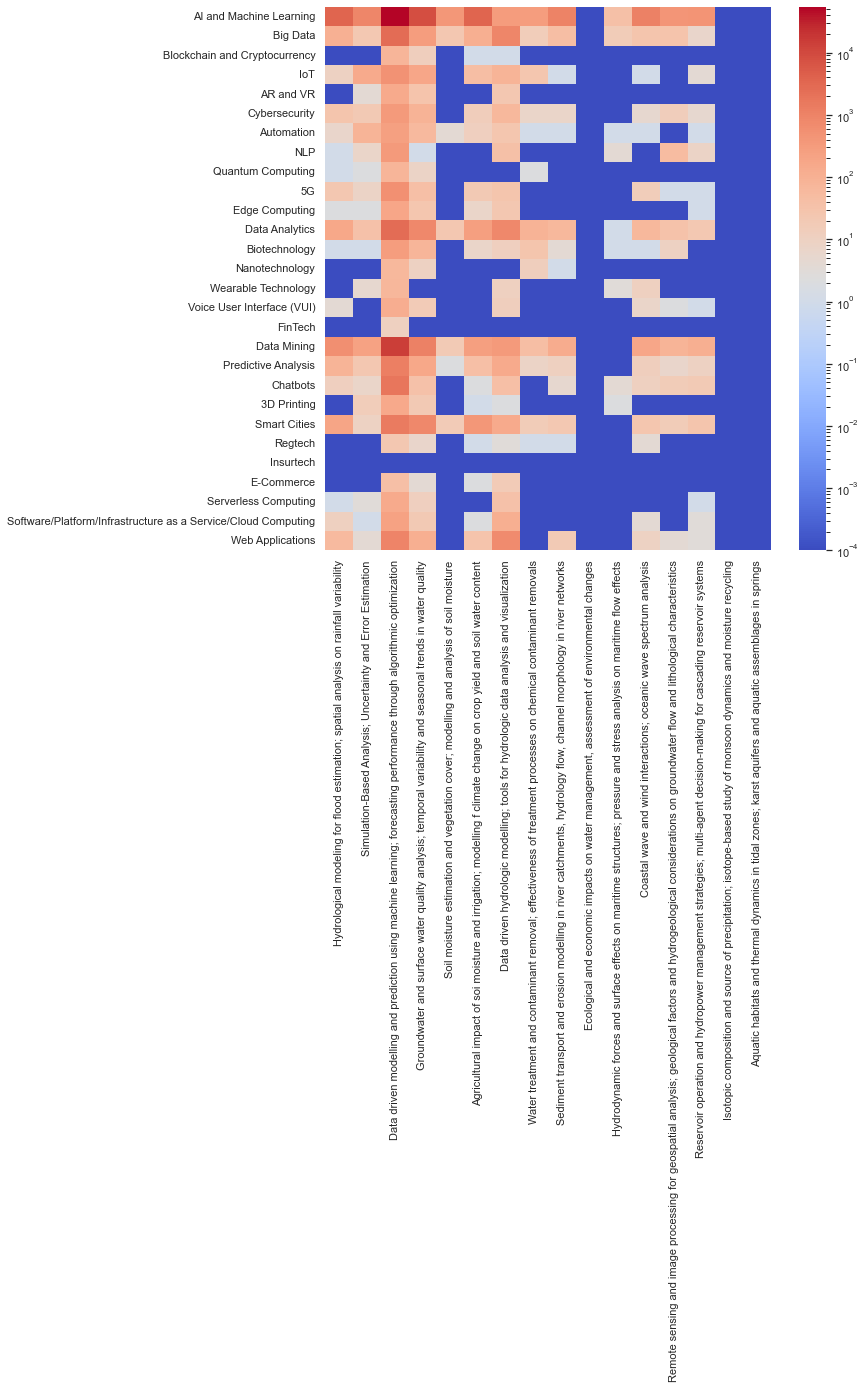

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1)
# sns.set_title('Correlation Between Technologies Used and Hydrology Subtopics', fontsize = 16, weight = 'bold')
ax.set_xlabel('Hydrology Subtopic', fontdict=dict(weight='bold'))
sns.heatmap(pair_df, cmap="coolwarm", xticklabels = pair_df.columns.tolist(), yticklabels =pair_df.index.tolist(),norm = LogNorm())
fig.savefig("heatmap_topics.png")


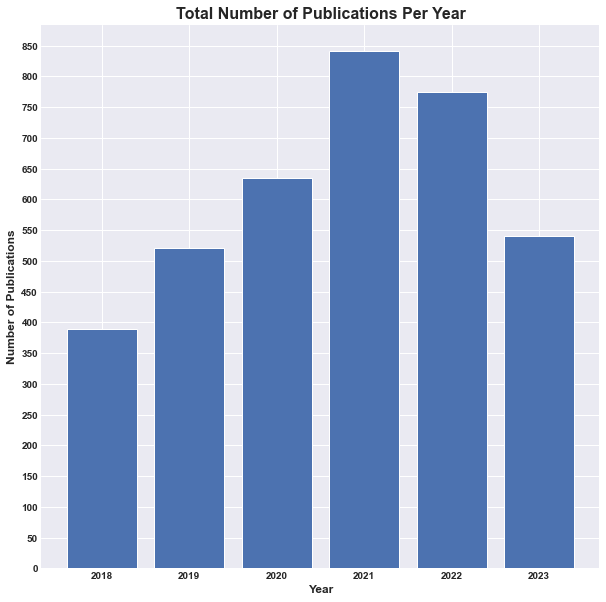

In [21]:
"""
Plot a time series of year vs the number of articles obtained.
"""
plt.figure(figsize = (10,10))
by_year = papers.groupby('year').count()
years = by_year.index.tolist()
cnts = by_year['journal_id'].tolist()
plt.yticks(np.arange(0, 1000, 50), fontsize = 10, weight = 'bold')
plt.style.use('seaborn-darkgrid')
plt.ylabel("Number of Publications",fontsize = 12, weight = 'bold')
plt.xlabel("Year", fontsize = 12, weight = 'bold')
plt.title("Total Number of Publications Per Year",fontsize = 16, weight = 'bold')
plt.bar(x = years, height = cnts)
plt.xticks(years, fontsize = 10, weight = 'bold')
plt.savefig('total_pubs_per_yr.png')#,transparent=True)

In [5]:
affiliations

,aff_id,eid,name,country,author_count,doc-count
0,60031268,10-s2.0-60031268,Daneshgahe Shahid Bahonar-e-Kerman,Iran,3834,14667
1,60007989,10-s2.0-60007989,Universiteit Utrecht,Netherlands,17385,103116
2,60022461,10-s2.0-60022461,Technical University of Crete,Greece,1640,9706
3,60104134,10-s2.0-60104134,Khalifa University of Science and Technology,United Arab Emirates,3159,21236
4,60025063,10-s2.0-60025063,KU Leuven,Belgium,26413,172551
...,...,...,...,...,...,...
12292,60030486,10-s2.0-60030486,"University of Idaho, Idaho Falls",United States,150,874
12293,108119111,10-s2.0-108119111,Health Department,United States,1,7
12294,119716405,10-s2.0-119716405,"A Division of RESPEC, INC",United States,0,3
12295,108152689,10-s2.0-108152689,Primodal Inc.,Canada,0,9


In [32]:
papers


,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
7,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104486,2023-08-01,S0309170823001215,2-s2.0-85163143487,8.516314e+10,0.0,"58264479500, 7006929576, 58369384900, 8519969000",60030856:60032781:60032781:60032781,True
11,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104493,2023-08-01,S0309170823001288,2-s2.0-85163003446,8.516300e+10,0.0,"58355884500, 6603318220, 36238598900",60032259:60032259:60032259,True
19,1,1,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104463,2023-07-01,S0309170823000982,2-s2.0-85160420259,8.516042e+10,0.0,"57211081797, 15725750100",60032086:60032086,True
24,1,2,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104442,2023-06-01,S0309170823000775,2-s2.0-85157994627,8.515799e+10,0.0,"58235576800, 58236260700, 57272419000, 5721607...",60007751:60009512:60007751:60007751,True
35,1,3,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104440,2023-05-01,S0309170823000751,2-s2.0-85153501856,8.515350e+10,0.0,"35998676200, 6701763216, 55184572800",60011347:60011347:60011347,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26456,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.007,2018-02-01,S1364815217302815,2-s2.0-85034735449,8.503474e+10,18.0,"55970453700, 55199776800, 23494154300, 7801470...",60013959:60013959:60013959:60014170:60004923:6...,True
26458,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.010,2018-02-01,S1364815217304954,2-s2.0-85034829843,8.503483e+10,17.0,"56709610000, 7202264338, 8894889800, 140438786...",60006514:60004923:60006514:60006514:60006514:6...,True
26460,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.031,2018-02-01,S1364815216310490,2-s2.0-85035799017,8.503580e+10,33.0,"56290593900, 55575701800, 51663266700, 5644377...","60011019, 101967177:60031003:101967177, 600110...",True
26464,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.002,2018-02-01,S1364815217300774,2-s2.0-85034745757,8.503475e+10,36.0,"57194577956, 36716364600, 6507478686, 12808750...",60030657:60020585:60020585:60030657:60020585,True


In [22]:
"""Plot number of country of origin (from affiliations) vs number of publications (we might
be able to create a map of the world that shows the percentages"""

countries = {}
for i in set(papers.index.tolist()):
#     print(i)
    aff_list = re.split(':|, ',papers.loc[i]['affiliations'])
    
    try:
        countries_list = [affiliations[affiliations['aff_id'] == int(aff)]['country'].tolist()[0] for aff in aff_list]
    except Exception as e:
#         broken.append(i)
        continue
    
#     print(countries_list)
    for co in set(countries_list):
        if co not in countries.keys():
            countries[co] = 1
        else:
            countries[co] +=1

sorted_countries = {k: v for k, v in sorted(countries.items(), key=lambda item: item[1], reverse = True)}



In [13]:
pd.DataFrame(columns = ['country', 'publications'], data  = list(sorted_countries.items())).to_csv(os.getcwd().replace('scripts', 'data') + '/country_pubs.csv', index = False)



In [36]:
sorted_countries


{'China': 1266,
 'United States': 910,
 'Australia': 258,
 'Canada': 230,
 'Iran': 215,
 'India': 191,
 'United Kingdom': 171,
 'Germany': 152,
 'South Korea': 145,
 'Italy': 142,
 'Spain': 123,
 'France': 106,
 'Netherlands': 92,
 'Brazil': 90,
 'Japan': 78,
 'Switzerland': 63,
 'Sweden': 62,
 'Viet Nam': 56,
 'Norway': 56,
 'Turkey': 54,
 'Belgium': 50,
 'Portugal': 48,
 'Egypt': 45,
 'Austria': 40,
 'Taiwan': 39,
 'New Zealand': 39,
 'Hong Kong': 39,
 'Malaysia': 38,
 'Poland': 35,
 'Singapore': 34,
 'Finland': 34,
 'Greece': 32,
 'Denmark': 31,
 'Ethiopia': 24,
 'Mexico': 23,
 'Ireland': 23,
 'Nigeria': 23,
 'Israel': 22,
 'Czech Republic': 21,
 'Chile': 21,
 'Cyprus': 21,
 'Pakistan': 21,
 'Russian Federation': 20,
 'United Arab Emirates': 20,
 'Saudi Arabia': 20,
 'South Africa': 19,
 'Thailand': 18,
 'Bangladesh': 18,
 'Ghana': 15,
 'Iraq': 15,
 'Algeria': 12,
 'Slovenia': 11,
 'Indonesia': 11,
 'Georgia': 11,
 'Ecuador': 10,
 'Argentina': 10,
 'Colombia': 10,
 'Morocco': 10,
 '

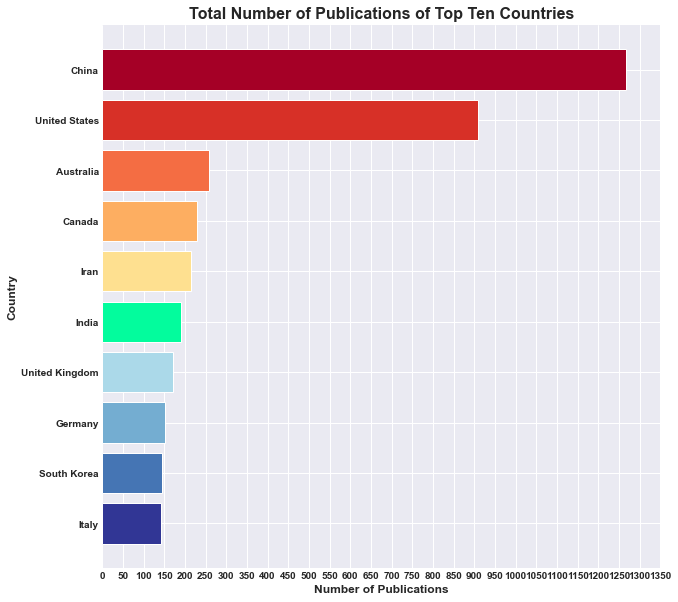

In [23]:
countries = list(sorted_countries.keys())[:10]
pubs = list(sorted_countries.values())[:10]

plt.figure(figsize = (10,10))
plt.barh(countries, pubs, color = custom_cmap.colors)
plt.yticks(fontsize = 10, weight = 'bold')

plt.xticks(np.arange(0, 1400, 50), fontsize = 10, weight = 'bold')
# plt.style.use('seaborn-darkgrid')
plt.gca().invert_yaxis()
plt.title("Total Number of Publications of Top Ten Countries", fontsize = 16, weight = 'bold')
plt.ylabel("Country",fontsize = 12, weight = 'bold')
plt.xlabel("Number of Publications",fontsize = 12, weight = "bold")
# plt.yscale('log')
# plt.yticks(ticks = [1,30,75,750,3000,7500,30000,75000], labels = [1,30,75,750,3000,7500,30000,75000])
plt.savefig('total_pubs_t10_countries.png')#,transparent=True)
plt.show()


In [28]:
"""
Obtain the top 10 universities and research centers based on number of publications.
"""
pubs = {}
for i in set(papers.index.tolist()):
    aff_list = re.split(':|, ',papers.loc[i]['affiliations'])
    
    for aff in set(aff_list):
        if aff not in pubs.keys():
            pubs[aff] = 1
        else:
            pubs[aff] +=1

sorted_aff_pubs = {k: v for k, v in sorted(pubs.items(), key=lambda item: item[1], reverse = True)}



In [29]:
sorted_aff_pubs

{'60027363': 123,
 '60010851': 97,
 '60029306': 90,
 '60023237': 81,
 '60031041': 74,
 '60031150': 70,
 '60019499': 69,
 '60005488': 55,
 '60011347': 52,
 '60025278': 50,
 '60013551': 43,
 '60006622': 43,
 '60028333': 40,
 '60022927': 39,
 '60021182': 38,
 '60020547': 38,
 '60021391': 37,
 '60033100': 31,
 '60027277': 30,
 '60019533': 30,
 '60002612': 29,
 '60006019': 29,
 '60064143': 28,
 '60014966': 26,
 '60105683': 26,
 '60272995': 26,
 '60003353': 26,
 '60009226': 25,
 '60025858': 24,
 '60000745': 24,
 '60004156': 24,
 '60031707': 24,
 '60014171': 24,
 '60015881': 23,
 '60016521': 23,
 '60025761': 23,
 '60025084': 23,
 '60027090': 22,
 '60018229': 22,
 '60026553': 22,
 '60004923': 22,
 '60029322': 22,
 '60014439': 21,
 '60025804': 21,
 '60033316': 20,
 '60013682': 20,
 '60020258': 20,
 '60014153': 20,
 '60022422': 20,
 '60013402': 19,
 '60023932': 19,
 '60017705': 19,
 '60017161': 19,
 '60001989': 19,
 '60031248': 19,
 '60026981': 19,
 '60087826': 19,
 '60273019': 19,
 '60022414': 

In [46]:
pd.DataFrame(columns = ['affiliation', 'citations'], data  = list(sorted_aff_pubs.items())).to_csv(os.getcwd().replace('scripts', 'data') + '/affiliation_citations.csv', index = False)




In [30]:
best_affs = list(sorted_aff_pubs.items())[:10]

In [31]:
best_affs

[('60027363', 123),
 ('60010851', 97),
 ('60029306', 90),
 ('60023237', 81),
 ('60031041', 74),
 ('60031150', 70),
 ('60019499', 69),
 ('60005488', 55),
 ('60011347', 52),
 ('60025278', 50)]

In [37]:
affils[5] = ' '.join(affils[5].split(' ')[:7])
affils

['University of Chinese Academy of Sciences',
 'Hohai University',
 'Wuhan University',
 'Beijing Normal University',
 'Northwest A&F University',
 'Institute of Geographical Sciences and Natural Resources',
 'Chinese Academy of Sciences',
 'China Institute of Water Resources and Hydropower Research',
 'United States Geological Survey',
 'Tsinghua University']

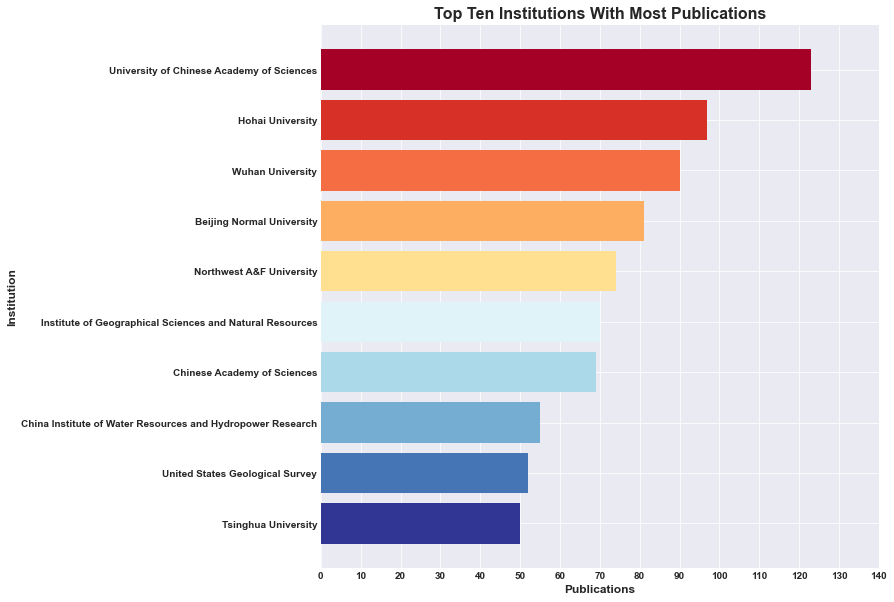

In [39]:
pubs = list(v[1] for v in best_affs)
affils = [affiliations[affiliations['aff_id']==int(aff[0])].iloc[0,2] for aff in best_affs]

plt.figure(figsize = (10,10))
plt.barh(affils, pubs, color = custom_cmap.colors)
plt.yticks(fontsize = 10, weight = 'bold')

plt.xticks(np.arange(0, 150, 10), fontsize = 10, weight = 'bold')
plt.style.use('seaborn-darkgrid')
plt.gca().invert_yaxis()
plt.title("Top Ten Institutions With Most Publications", fontsize = 16, weight = 'bold')
plt.ylabel("Institution", fontsize = 12, weight = 'bold')
plt.xlabel("Publications", fontsize = 12, weight = 'bold')
# plt.yscale('log')
# plt.yticks(ticks = [1,30,75,750,3000,7500,30000,75000], labels = [1,30,75,750,3000,7500,30000,75000])
plt.savefig('total_pubs_t10_affs.png')#,transparent=True)
plt.show()




In [10]:
papers

,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
7,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104486,2023-08-01,S0309170823001215,2-s2.0-85163143487,8.516314e+10,0.0,"58264479500, 7006929576, 58369384900, 8519969000",60030856:60032781:60032781:60032781,True
11,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104493,2023-08-01,S0309170823001288,2-s2.0-85163003446,8.516300e+10,0.0,"58355884500, 6603318220, 36238598900",60032259:60032259:60032259,True
19,1,1,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104463,2023-07-01,S0309170823000982,2-s2.0-85160420259,8.516042e+10,0.0,"57211081797, 15725750100",60032086:60032086,True
24,1,2,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104442,2023-06-01,S0309170823000775,2-s2.0-85157994627,8.515799e+10,0.0,"58235576800, 58236260700, 57272419000, 5721607...",60007751:60009512:60007751:60007751,True
35,1,3,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104440,2023-05-01,S0309170823000751,2-s2.0-85153501856,8.515350e+10,0.0,"35998676200, 6701763216, 55184572800",60011347:60011347:60011347,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26456,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.007,2018-02-01,S1364815217302815,2-s2.0-85034735449,8.503474e+10,18.0,"55970453700, 55199776800, 23494154300, 7801470...",60013959:60013959:60013959:60014170:60004923:6...,True
26458,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.010,2018-02-01,S1364815217304954,2-s2.0-85034829843,8.503483e+10,17.0,"56709610000, 7202264338, 8894889800, 140438786...",60006514:60004923:60006514:60006514:60006514:6...,True
26460,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.031,2018-02-01,S1364815216310490,2-s2.0-85035799017,8.503580e+10,33.0,"56290593900, 55575701800, 51663266700, 5644377...","60011019, 101967177:60031003:101967177, 600110...",True
26464,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.002,2018-02-01,S1364815217300774,2-s2.0-85034745757,8.503475e+10,36.0,"57194577956, 36716364600, 6507478686, 12808750...",60030657:60020585:60020585:60030657:60020585,True


In [32]:
"""
Obtain the top 10 universities and research centers based on number of citations.
"""
pubs = {}
for i in set(papers.index.tolist()):
    aff_list = re.split(':|, ',papers.loc[i]['affiliations'])
    
    for aff in set(aff_list):
        if aff not in pubs.keys():
            pubs[aff] = papers.loc[i]['citations']
        else:
            pubs[aff] +=papers.loc[i]['citations']

sorted_aff_pubs = {k: v for k, v in sorted(pubs.items(), key=lambda item: item[1], reverse = True)}




In [11]:
sorted_aff_pubs

{'60029306': 2151.0,
 '60010851': 2134.0,
 '60000221': 1829.0,
 '60006622': 1687.0,
 '60019722': 1660.0,
 '60011604': 1601.0,
 '60031041': 1574.0,
 '112599856': 1539.0,
 '60027363': 1523.0,
 '60078563': 1521.0,
 '60023237': 1306.0,
 '60025278': 1175.0,
 '60111656': 1052.0,
 '60021391': 1005.0,
 '60001619': 994.0,
 '60019499': 968.0,
 '60022927': 968.0,
 '60023932': 901.0,
 '60020258': 858.0,
 '60031150': 840.0,
 '60005488': 817.0,
 '60006471': 804.0,
 '60020547': 794.0,
 '60033100': 773.0,
 '60027884': 738.0,
 '60003353': 736.0,
 '60006019': 734.0,
 '60011347': 710.0,
 '60031707': 705.0,
 '60029157': 701.0,
 '60103926': 699.0,
 '60028333': 694.0,
 '60025761': 651.0,
 '60004956': 648.0,
 '60104463': 646.0,
 '60027277': 598.0,
 '60071163': 590.0,
 '60013551': 584.0,
 '60022414': 579.0,
 '60007278': 577.0,
 '60002092': 576.0,
 '60002612': 565.0,
 '60017161': 548.0,
 '60029322': 548.0,
 '60030867': 545.0,
 '60020321': 540.0,
 '60025084': 537.0,
 '60021182': 534.0,
 '60109392': 530.0,
 '600

In [14]:
affils

NameError: name 'affils' is not defined

In [33]:
best_affs = list(sorted_aff_pubs.items())[:10]

In [34]:
affils = [affiliations[affiliations['aff_id']==int(aff[0])].iloc[0,2] for aff in best_affs]



In [38]:
pubs = list(v[1] for v in best_affs)

In [35]:
affils

['Wuhan University',
 'Hohai University',
 'University of Colorado Boulder',
 'University of Tabriz',
 'Technische Universität München',
 'Technische Universität Berlin',
 'Northwest A&F University',
 'Kompetenzzentrum Wasser Berlin gGmbH',
 'University of Chinese Academy of Sciences',
 'Ton-Duc-Thang University']

In [49]:
papers[papers['affiliations'].str.contains('60000221')].iat[2,3]

'https://www.sciencedirect.com/science/article/pii/S0022169421005461'

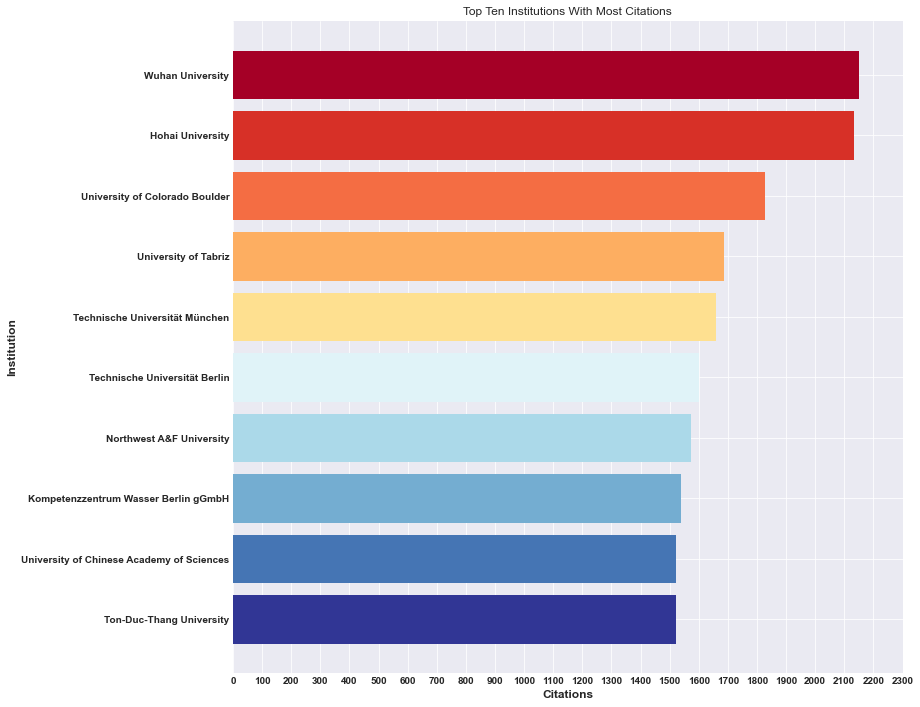

In [43]:
# pubs = list(v[1] for v in best_affs)
affils = [affiliations[affiliations['aff_id']==int(aff[0])].iloc[0,2] for aff in best_affs]

plt.figure(figsize = (12,12))
plt.barh(affils, pubs, color = custom_cmap.colors)
affils[5] = ' '.join(affils[5].split(' ')[:7])
plt.xticks(np.arange(0, 2400, 100), fontsize = 10, weight = 'bold')
plt.style.use('seaborn-darkgrid')
plt.yticks(fontsize = 10, weight = 'bold')
plt.gca().invert_yaxis()
plt.title("Top Ten Institutions With Most Citations")
plt.ylabel("Institution", fontsize = 12, weight = 'bold')
plt.xlabel("Citations", fontsize = 12, weight = 'bold')
# plt.yscale('log')
# plt.yticks(ticks = [1,30,75,750,3000,7500,30000,75000], labels = [1,30,75,750,3000,7500,30000,75000])
plt.savefig('total_cits_t10_affs.png')#,transparent=True)
plt.show()



In [254]:
[affiliations[affiliations['aff_id']==int(aff[0])].iloc[0,2] for aff in best_affs]

['University of Chinese Academy of Sciences',
 'Tsinghua University',
 'Harbin Institute of Technology',
 'Tongji University',
 'Hohai University',
 'Northwest A&F University',
 'Chinese Academy of Sciences',
 'Wuhan University',
 'Nanjing University',
 'Hunan University']

In [119]:
[affiliations[affiliations['aff_id']==int(aff[0])] for aff in best_affs]

[       aff_id               eid                      name country  \
 275  60031041  10-s2.0-60031041  Northwest A&F University   China   
 
      author_count  doc-count  
 275         27777      47571  ,
       aff_id               eid              name country  author_count  \
 18  60010851  10-s2.0-60010851  Hohai University   China         19513   
 
     doc-count  
 18      58470  ,
       aff_id               eid                                       name  \
 31  60027363  10-s2.0-60027363  University of Chinese Academy of Sciences   
 
    country  author_count  doc-count  
 31   China         79023     296208  ,
       aff_id               eid              name country  author_count  \
 81  60029306  10-s2.0-60029306  Wuhan University   China         53311   
 
     doc-count  
 81     157339  ,
        aff_id               eid                           name country  \
 330  60013551  10-s2.0-60013551  China Agricultural University   China   
 
      author_count  doc-count 

In [17]:
"""
Obtain the top 10% of countries that provide the most number of research. You can do 
this based on the categories already set in place.contry vs.citations
"""

'\nObtain the top 10% of countries that provide the most number of research. You can do \nthis based on the categories already set in place.\n\n'

In [58]:
papers

,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
7,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104486,2023-08-01,S0309170823001215,2-s2.0-85163143487,8.516314e+10,0.0,"58264479500, 7006929576, 58369384900, 8519969000",60030856:60032781:60032781:60032781,True
11,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104493,2023-08-01,S0309170823001288,2-s2.0-85163003446,8.516300e+10,0.0,"58355884500, 6603318220, 36238598900",60032259:60032259:60032259,True
19,1,1,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104463,2023-07-01,S0309170823000982,2-s2.0-85160420259,8.516042e+10,0.0,"57211081797, 15725750100",60032086:60032086,True
24,1,2,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104442,2023-06-01,S0309170823000775,2-s2.0-85157994627,8.515799e+10,0.0,"58235576800, 58236260700, 57272419000, 5721607...",60007751:60009512:60007751:60007751,True
35,1,3,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104440,2023-05-01,S0309170823000751,2-s2.0-85153501856,8.515350e+10,0.0,"35998676200, 6701763216, 55184572800",60011347:60011347:60011347,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26456,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.007,2018-02-01,S1364815217302815,2-s2.0-85034735449,8.503474e+10,18.0,"55970453700, 55199776800, 23494154300, 7801470...",60013959:60013959:60013959:60014170:60004923:6...,True
26458,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.010,2018-02-01,S1364815217304954,2-s2.0-85034829843,8.503483e+10,17.0,"56709610000, 7202264338, 8894889800, 140438786...",60006514:60004923:60006514:60006514:60006514:6...,True
26460,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.031,2018-02-01,S1364815216310490,2-s2.0-85035799017,8.503580e+10,33.0,"56290593900, 55575701800, 51663266700, 5644377...","60011019, 101967177:60031003:101967177, 600110...",True
26464,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.002,2018-02-01,S1364815217300774,2-s2.0-85034745757,8.503475e+10,36.0,"57194577956, 36716364600, 6507478686, 12808750...",60030657:60020585:60020585:60030657:60020585,True


In [15]:
countries = {}
for i in set(papers.index.tolist()):
#     print(i)
    aff_list = re.split(':|, ',papers.loc[i]['affiliations'])
    
    try:
        countries_list = [affiliations[affiliations['aff_id'] == int(aff)]['country'].tolist()[0] for aff in aff_list]
    except Exception as e:
#         broken.append(i)
        continue
    
#     print(countries_list)
    for co in set(countries_list):
        if co not in countries.keys():
            countries[co]=0
        
        countries[co]+=papers.loc[i]['citations']

In [20]:
countries

{'Iran': 18123.0,
 'Netherlands': 18363.0,
 'United Arab Emirates': 2248.0,
 'Greece': 2311.0,
 'Belgium': 5762.0,
 'United States': 93584.0,
 'Canada': 21929.0,
 'China': 201343.0,
 'Poland': 3808.0,
 'Switzerland': 9127.0,
 'Australia': 34034.0,
 'Italy': 16605.0,
 'Denmark': 6443.0,
 'France': 12598.0,
 'Germany': 22272.0,
 'Taiwan': 4795.0,
 'Japan': 9914.0,
 'Spain': 14035.0,
 'South Korea': 13805.0,
 'Ghana': 1014.0,
 'India': 24267.0,
 'Russian Federation': 1527.0,
 'Oman': 1005.0,
 'Austria': 4179.0,
 'Morocco': 1263.0,
 'United Kingdom': 19590.0,
 'Sweden': 6906.0,
 'Brazil': 8097.0,
 'Singapore': 11458.0,
 'Norway': 6990.0,
 'Indonesia': 1238.0,
 'Finland': 3868.0,
 'New Zealand': 3715.0,
 'Nepal': 636.0,
 'Saudi Arabia': 3764.0,
 'Israel': 2996.0,
 'Luxembourg': 379.0,
 'Mexico': 2122.0,
 'Colombia': 993.0,
 'Democratic Republic Congo': 60.0,
 'South Africa': 3032.0,
 'Argentina': 1318.0,
 'Lebanon': 433.0,
 'Egypt': 4435.0,
 'Qatar': 1587.0,
 'Hong Kong': 8146.0,
 'Banglade

In [22]:
sorted_countries_citations = {k: v for k, v in sorted(countries.items(), key=lambda item: item[1], reverse = True)}


In [62]:
pd.DataFrame(columns = ['country', 'citations'], data  = list(sorted_countries_citations.items())).to_csv(os.getcwd().replace('scripts', 'data') + '/country_citations.csv', index = False)



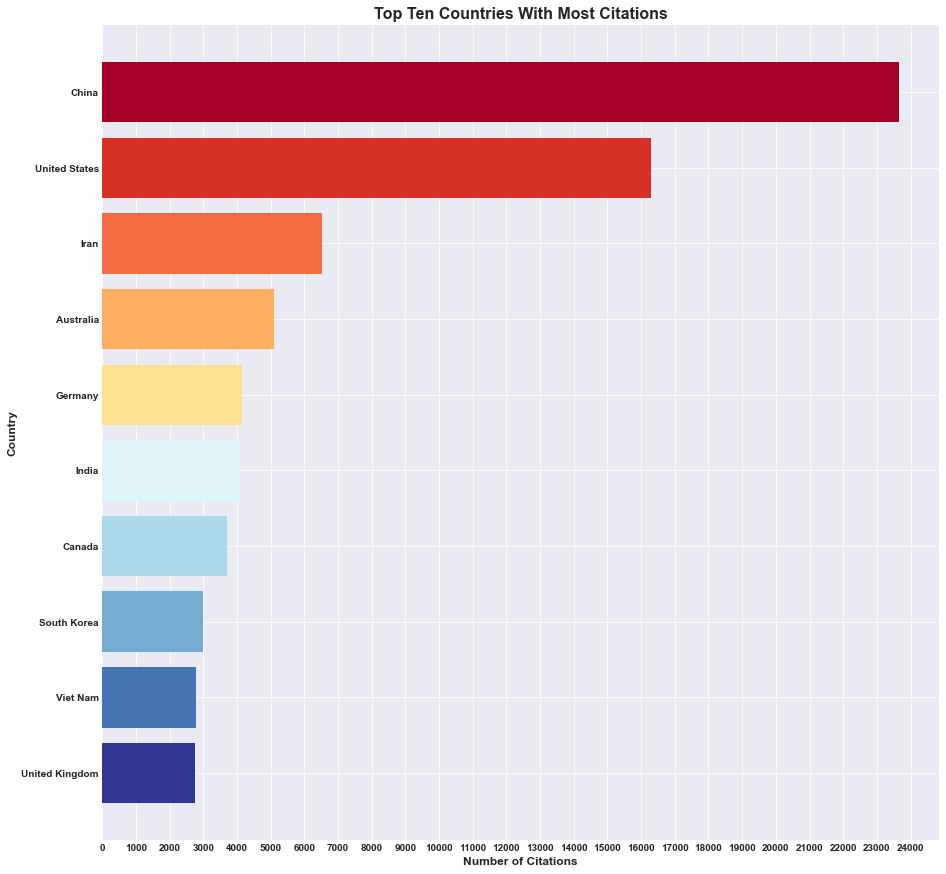

In [24]:
cits = list(sorted_countries_citations.values())[:10]
counts = list(sorted_countries_citations.keys())[:10]

plt.figure(figsize = (15,15))
plt.barh(counts, cits, color = custom_cmap.colors)
plt.yticks(fontsize = 10, weight = 'bold')
plt.xticks(np.arange(0, 25000, 1000),fontsize = 10, weight = 'bold')
plt.style.use('seaborn-darkgrid')
plt.gca().invert_yaxis()
plt.ylabel("Country",fontsize = 12, weight = 'bold')
plt.xlabel("Number of Citations",fontsize = 12, weight = 'bold')
plt.title("Top Ten Countries With Most Citations",fontsize = 16, weight = 'bold')
plt.savefig('total_cits_t10_countries.png')#,transparent=True)
# plt.yscale('log')
# plt.yticks(ticks = [1,30,75,750,3000,7500,30000,75000], labels = [1,30,75,750,3000,7500,30000,75000])

plt.show()

In [23]:
sorted_countries_citations


{'China': 201343.0,
 'United States': 93584.0,
 'Australia': 34034.0,
 'India': 24267.0,
 'Germany': 22272.0,
 'Canada': 21929.0,
 'United Kingdom': 19590.0,
 'Netherlands': 18363.0,
 'Iran': 18123.0,
 'Italy': 16605.0,
 'Spain': 14035.0,
 'South Korea': 13805.0,
 'France': 12598.0,
 'Singapore': 11458.0,
 'Japan': 9914.0,
 'Switzerland': 9127.0,
 'Hong Kong': 8146.0,
 'Brazil': 8097.0,
 'Norway': 6990.0,
 'Turkey': 6914.0,
 'Sweden': 6906.0,
 'Portugal': 6843.0,
 'Denmark': 6443.0,
 'Viet Nam': 5813.0,
 'Belgium': 5762.0,
 'Malaysia': 5418.0,
 'Taiwan': 4795.0,
 'Egypt': 4435.0,
 'Austria': 4179.0,
 'Finland': 3868.0,
 'Poland': 3808.0,
 'Saudi Arabia': 3764.0,
 'Pakistan': 3760.0,
 'New Zealand': 3715.0,
 'South Africa': 3032.0,
 'Israel': 2996.0,
 'Bangladesh': 2401.0,
 'Greece': 2311.0,
 'United Arab Emirates': 2248.0,
 'Mexico': 2122.0,
 'Ireland': 1966.0,
 'Czech Republic': 1929.0,
 'Ethiopia': 1838.0,
 'Cyprus': 1684.0,
 'Thailand': 1659.0,
 'Nigeria': 1596.0,
 'Qatar': 1587.0,


In [114]:
affiliations

,aff_id,eid,name,country,author_count,doc-count
0,60031268,10-s2.0-60031268,Daneshgahe Shahid Bahonar-e-Kerman,Iran,3834,14667
1,60007989,10-s2.0-60007989,Universiteit Utrecht,Netherlands,17385,103116
2,60022461,10-s2.0-60022461,Technical University of Crete,Greece,1640,9706
3,60104134,10-s2.0-60104134,Khalifa University of Science and Technology,United Arab Emirates,3159,21236
4,60025063,10-s2.0-60025063,KU Leuven,Belgium,26413,172551
...,...,...,...,...,...,...
12292,60030486,10-s2.0-60030486,"University of Idaho, Idaho Falls",United States,150,874
12293,108119111,10-s2.0-108119111,Health Department,United States,1,7
12294,119716405,10-s2.0-119716405,"A Division of RESPEC, INC",United States,0,3
12295,108152689,10-s2.0-108152689,Primodal Inc.,Canada,0,9


In [ ]:
# countries total percent pubs

In [50]:
percent_pubs_countries = pd.DataFrame(columns = list(set(affiliations['country'].tolist()))) 


In [51]:
for j in range(2018,2024):
    countries = {}
    
    for co in list(set(affiliations['country'].tolist())):
        countries[co] = 0
    
    papers_tmp = papers[papers['year']==j]
    
    total_pubs = len(papers_tmp.index)
    
    for i in set(papers_tmp.index.tolist()):
    #     print(i)
        aff_list = re.split(':|, ',papers_tmp.loc[i]['affiliations'])

        try:
            countries_list = [affiliations[affiliations['aff_id'] == int(aff)]['country'].tolist()[0] for aff in aff_list]
        except Exception as e:
    #         broken.append(i)
            continue

    #     print(countries_list)
        for co in set(countries_list):
            countries[co]+=1/total_pubs
            
    percent_pubs_countries.loc[len(percent_pubs_countries.index)] = countries.values()

    
    

In [52]:
sorted_pubs = percent_pubs_countries[percent_pubs_countries.sum().sort_values(ascending=False).index]


In [53]:
sorted_pubs

,China,United States,Australia,Canada,Iran,India,United Kingdom,Germany,South Korea,Italy,...,Guatemala,Venezuela,Albania,Djibouti,Haiti,Panama,Congo,Malawi,Sao Tome and Principe,New Caledonia
0,0.241645,0.298201,0.082262,0.046272,0.048843,0.035990,0.041131,0.053985,0.043702,0.038560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.257198,0.261036,0.092131,0.057582,0.076775,0.049904,0.055662,0.042226,0.049904,0.042226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.335433,0.286614,0.055118,0.053543,0.061417,0.051969,0.047244,0.028346,0.033071,0.034646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.353919,0.239905,0.061758,0.073634,0.065321,0.051069,0.041568,0.045131,0.035629,0.042755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.369509,0.219638,0.073643,0.065891,0.050388,0.059432,0.045220,0.041344,0.038760,0.033592,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.446296,0.192593,0.062963,0.064815,0.042593,0.053704,0.048148,0.038889,0.038889,0.038889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
pd.DataFrame(columns = ['country', 'percent_pubs'], data  = list(sorted_pubs.items())).to_csv(os.getcwd().replace('scripts', 'data') + '/country_percent_pubs.csv', index = False)




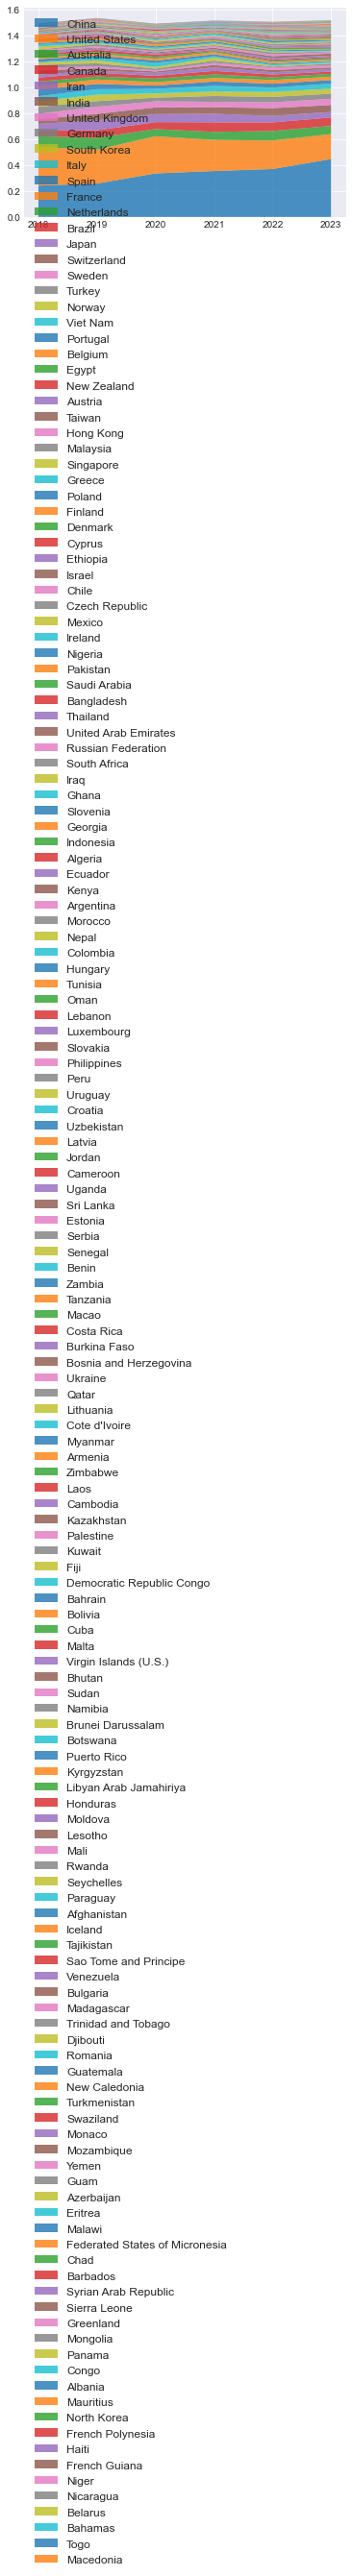

In [52]:
#All individual words
plt.stackplot([int(x + 2018) for x in sorted_pubs.index],
              [sorted_pubs[c] for c in sorted_pubs.columns],
              labels=sorted_pubs.columns.tolist(),
              alpha=0.8)

plt.legend(loc=2, fontsize='large')
plt.show()

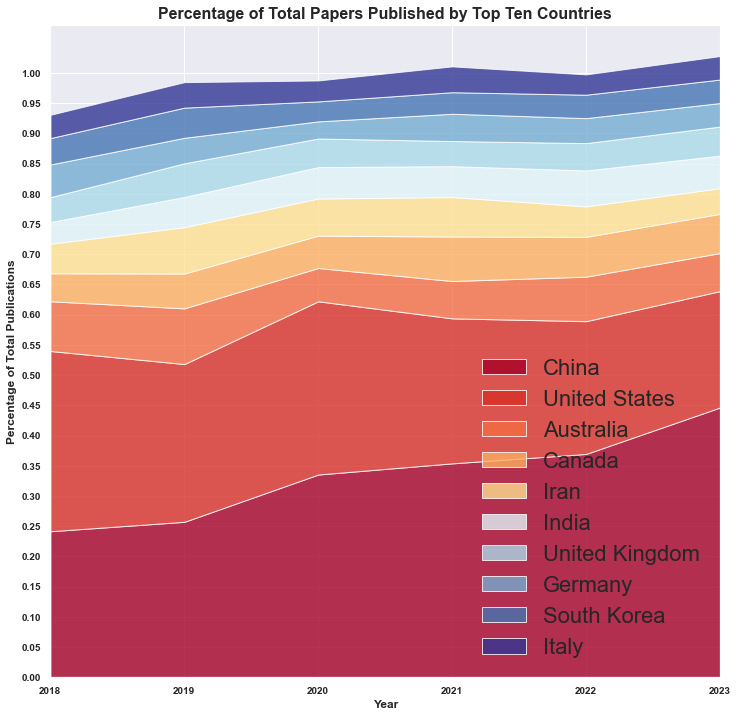

In [56]:
sns.set(font_scale = 2)
plt.figure(figsize = (12,12))
plt.stackplot([int(x + 2018) for x in sorted_pubs.index],
              [sorted_pubs[c] for c in sorted_pubs.iloc[:, : 10]],
              labels=sorted_pubs.columns.tolist()[:10],
              alpha=0.8, colors = custom_cmap.colors)
plt.style.use('seaborn-darkgrid')
# plt.gca().invert_yaxis()
plt.title("Percentage of Total Papers Published by Top Ten Countries", fontsize = 16, weight = 'bold')

plt.yticks(np.arange(0, 1.05, 0.05), fontsize = 10, weight = 'bold')
plt.xticks(range(2018, 2024), fontsize = 10, weight = 'bold')
plt.ylabel("Percentage of Total Publications", fontsize = 12, weight = 'bold')
plt.xlabel("Year", fontsize = 12, weight = 'bold')

# plt.legend(loc=2, fontsize='large')
# plt.gca().invert_yaxis()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='lower right')
plt.margins(x=0)
plt.savefig('percent_pubs_t10_countries.png')#,transparent=True)
plt.show()

In [18]:
"""
Create a 2D area graph that shows how the percentage of each of the topics increases
over time. See Fig 3 from reference for guidance.
"""

'\nCreate a 2D area graph that shows how the percentage of each of the topics increases\nover time. See Fig 3 from reference for guidance.\n'

In [58]:
counts_years = pd.DataFrame(columns = [i for i in range(28)])

In [85]:
buzz_counts

,Column1,index,AI and Machine Learning,Big Data,Blockchain and Cryptocurrency,IoT,AR and VR,Cybersecurity,Automation,NLP,...,3D Printing,Smart Cities,Regtech,Insurtech,E-Commerce,Serverless Computing,Software/Platform/Infrastructure as a Service/Cloud Computing,Web Applications,doi,journal
0,0,7,48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104486,Advances in Water Resources
1,1,11,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104493,Advances in Water Resources
2,2,19,62,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104463,Advances in Water Resources
3,3,24,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,10.1016/j.advwatres.2023.104442,Advances in Water Resources
4,4,35,62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104440,Advances in Water Resources
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,3773,26456,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,10.1016/j.envsoft.2017.11.007,Environmental Modelling & Software
3697,3774,26458,8,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,10.1016/j.envsoft.2017.11.010,Environmental Modelling & Software
3698,3775,26460,25,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.envsoft.2017.11.031,Environmental Modelling & Software
3699,3776,26464,13,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.1016/j.envsoft.2017.11.002,Environmental Modelling & Software


In [70]:
sorted(buzz_counts['FinTech'], reverse = True)

[9,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [59]:
#area graph by year 
for i in range(2018, 2024):
    by_year = papers[papers['year']==i]
    
    numbers_by_year = []
    
    for paper_i in range(len(by_year.index.tolist())):
        
        l = buzz_counts.loc[paper_i].tolist()[2:-2]
        for i in range(len(l)):
            if l[i] !=0:
                l[i] = 1
                
        numbers_by_year.append(l)
#     print(numbers_by_year)
#     print(len(numbers_by_year[0]))
    
    counts_years.loc[len(counts_years.index)] = [sum(x) for x in zip(*numbers_by_year)]

In [60]:
sorted_counts_years = counts_years[counts_years.sum().sort_values(ascending=False).index]



In [71]:
words

,topic,keywords
0,AI and Machine Learning,"[Artificial Intelligence, Machine Learning, Su..."
1,Big Data,"[Hadoop, NoSQL, Apache Flink, Apache Kafka, Bi..."
2,Blockchain and Cryptocurrency,"[Blockchain, Cryptocurrency, Bitcoin, Ethereum..."
3,IoT,"[Smart Medical Device, Industrial IoT, Home Au..."
4,AR and VR,"[Augmented Reality, Virtual Reality, Mixed Rea..."
5,Cybersecurity,"[Cybersecurity, SQL Injection, Ethical Hacking..."
6,Automation,"[Automation, Industrial Automation, Home Autom..."
7,Modeling,"[ArcGIS, HEC-RAS, MIKE, FLOW-2D, QGIS, Telemac..."
8,NLP,"[NLP, Natural Language Processing, Sentiment A..."
9,Quantum Computing,"[Quantum Computing, Quantum Algorithm, Quantum..."


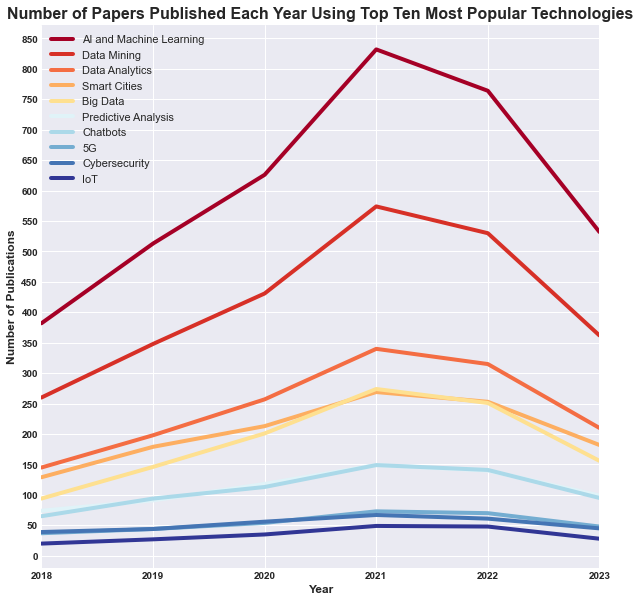

In [78]:
# sns.set(font_scale = 1)
plt.figure(figsize = (10,10))

for p in range(10):
    i = sorted_counts_years.columns[p]
    plt.plot(range(2018,2024), sorted_counts_years[i], label = words.drop(7).iat[i,0], linewidth = 4, color = custom_cmap.colors[p])
plt.style.use('seaborn-darkgrid')
plt.title("Number of Papers Published Each Year Using Top Ten Most Popular Technologies", fontsize = 16, weight = 'bold')

plt.ylabel("Number of Publications", fontsize = 12, weight = 'bold')
plt.xlabel("Year", fontsize = 12, weight = 'bold')
# plt.legend(loc=2, fontsize='large')
# plt.gca().invert_yaxis()
plt.yticks(np.arange(0, 900, 50), fontsize = 10, weight = 'bold')
plt.margins(x=0)
plt.xticks(range(2018,2024), fontsize = 10, weight = 'bold')
plt.legend(loc='upper left')
plt.savefig('topic_trends.png')#, transparent = True)
plt.show()

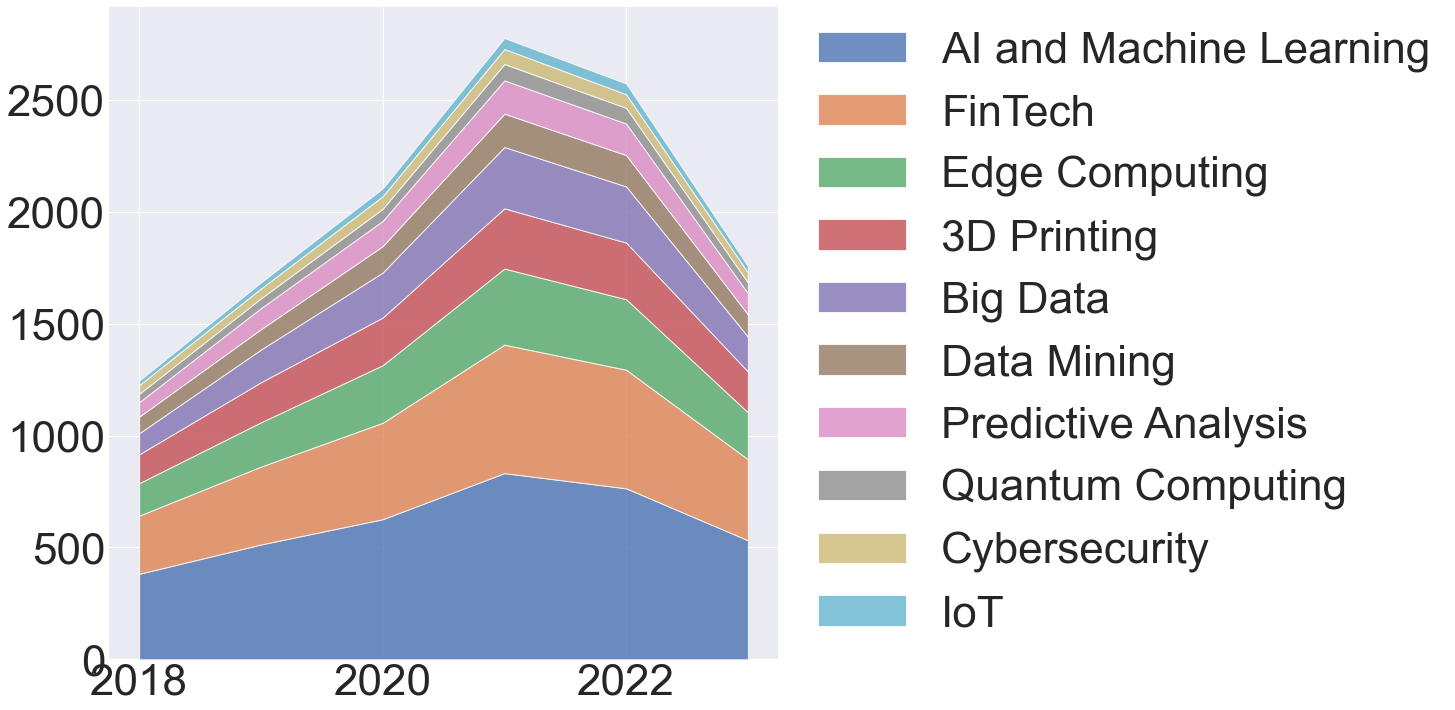

In [96]:
#All individual words GARBAGE
plt.figure(figsize = (12,12))
plt.stackplot([int(x + 2018) for x in counts_years.index],
              [sorted_counts_years[i] for i in sorted_counts_years.iloc[:, : 10]],
              labels=[words.iat[i,0] for i in sorted_counts_years.iloc[:, : 10]],
              alpha=0.8)

plt.legend(loc=2, fontsize='large')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [80]:
buzzwords_in_papers = buzzwords_in_papers.drop(buzzwords_in_papers[buzzwords_in_papers['sub_word']=='dapp'].index.tolist())
                         

In [81]:
buzzwords_in_papers.drop(buzzwords_in_papers[buzzwords_in_papers['category']=='blockchain'].index.tolist())


,paper_id,category,sub_word,buzz_id
0,0,Modeling,modeling,10
1,0,Modeling,modeling,10
2,0,Modeling,modeling,10
3,0,Modeling,modeling,10
4,0,Modeling,modeling,10
...,...,...,...,...
1111686,27399,Infrastructure as a Service (IaaS),databases,37
1111687,27399,Infrastructure as a Service (IaaS),databases,37
1111688,27399,Infrastructure as a Service (IaaS),databases,37
1111689,27399,Infrastructure as a Service (IaaS),databases,37


In [90]:
contexts_papers

,context
0,rated porous media hydrodynamic dispersion inv...
1,ity reaches a maximum value and then decreases...
2,additionally many attempts have been made us...
3,s the effects of grain heterogeneity will aid ...
4,edia at the pore scale there are two commonly...
...,...
1111706,e highly important for modelling of wrrfs are ...
1111707,eviation from the experimental results table 7...
1111708,fig 7 remark that the main precipitate fou...
1111709,improvement of model simulation speed was obta...


In [87]:
set(buzzwords_in_papers[buzzwords_in_papers['category']=='Blockchain']['sub_word'].tolist())


{'blockchain',
 'decentralization',
 'decentralized application',
 'digital asset',
 'dpos',
 'security token',
 'smart contracts',
 'solidity',
 'staking',
 'tokenization',
 'yield farming'}

In [ ]:
#by topic

In [72]:
buzz_counts

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,0,0,0,0,0,14,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,1,0,0,0,0,0,65,0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26469,8,0,0,0,0,0,9,1,4,0,...,5,5,0,0,0,0,0,0,1,2
26470,2,0,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,1,4
26471,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,6
26472,1,0,0,0,0,0,3,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [161]:
"""
number of buzzwords in each paper
"""

'\nnumber of buzzwords in each paper\n'

In [46]:
occur_per_topic

,count
0,192873
1,9386
2,2496
3,4624
4,453
5,3072
6,253827
7,7878
8,31423
9,7589


In [98]:
papers

,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
7,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104486,2023-08-01,S0309170823001215,2-s2.0-85163143487,8.516314e+10,0.0,"58264479500, 7006929576, 58369384900, 8519969000",60030856:60032781:60032781:60032781,True
11,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104493,2023-08-01,S0309170823001288,2-s2.0-85163003446,8.516300e+10,0.0,"58355884500, 6603318220, 36238598900",60032259:60032259:60032259,True
19,1,1,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104463,2023-07-01,S0309170823000982,2-s2.0-85160420259,8.516042e+10,0.0,"57211081797, 15725750100",60032086:60032086,True
24,1,2,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104442,2023-06-01,S0309170823000775,2-s2.0-85157994627,8.515799e+10,0.0,"58235576800, 58236260700, 57272419000, 5721607...",60007751:60009512:60007751:60007751,True
35,1,3,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104440,2023-05-01,S0309170823000751,2-s2.0-85153501856,8.515350e+10,0.0,"35998676200, 6701763216, 55184572800",60011347:60011347:60011347,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26456,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.007,2018-02-01,S1364815217302815,2-s2.0-85034735449,8.503474e+10,18.0,"55970453700, 55199776800, 23494154300, 7801470...",60013959:60013959:60013959:60014170:60004923:6...,True
26458,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.010,2018-02-01,S1364815217304954,2-s2.0-85034829843,8.503483e+10,17.0,"56709610000, 7202264338, 8894889800, 140438786...",60006514:60004923:60006514:60006514:60006514:6...,True
26460,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.031,2018-02-01,S1364815216310490,2-s2.0-85035799017,8.503580e+10,33.0,"56290593900, 55575701800, 51663266700, 5644377...","60011019, 101967177:60031003:101967177, 600110...",True
26464,28,67,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.11.002,2018-02-01,S1364815217300774,2-s2.0-85034745757,8.503475e+10,36.0,"57194577956, 36716364600, 6507478686, 12808750...",60030657:60020585:60020585:60030657:60020585,True


In [66]:
#country vs #articles by year
"""Plot number of country of origin (from affiliations) vs number of publications (we might
be able to create a map of the world that shows the percentages"""

countries = {}
for i in set(papers.index.tolist()):
#     print(i)
    aff_list = re.split(':|, ',papers.loc[i]['affiliations'])
    
    try:
        countries_list = [affiliations[affiliations['aff_id'] == int(aff)]['country'].tolist()[0] for aff in aff_list]
    except Exception as e:
#         broken.append(i)
        continue
    
#     print(countries_list)
    for co in set(countries_list):
        if co not in countries.keys():
            countries[co] = [0]*6
        
        countries[co][papers.loc[i]['year']-2018] +=1

sorted_countries = {k: v for k, v in sorted(countries.items(), key=lambda item: item[1], reverse = True)}



In [5]:
sorted_countries

{'China': [1082, 1542, 1944, 2422, 2259, 1618],
 'United States': [904, 938, 1089, 1092, 904, 561],
 'Australia': [272, 259, 302, 382, 316, 175],
 'Canada': [198, 209, 247, 323, 273, 163],
 'Germany': [192, 196, 198, 238, 226, 117],
 'India': [172, 213, 299, 295, 246, 169],
 'Italy': [164, 151, 163, 200, 142, 102],
 'United Kingdom': [162, 177, 181, 218, 207, 139],
 'France': [136, 152, 193, 174, 155, 114],
 'Netherlands': [132, 161, 167, 175, 165, 102],
 'Spain': [128, 144, 153, 172, 187, 116],
 'South Korea': [102, 128, 171, 203, 132, 93],
 'Iran': [95, 188, 220, 220, 169, 79],
 'Brazil': [87, 122, 115, 142, 108, 54],
 'Japan': [87, 101, 125, 122, 108, 66],
 'Switzerland': [72, 62, 71, 99, 86, 52],
 'Sweden': [65, 55, 63, 96, 74, 55],
 'Norway': [57, 66, 67, 101, 51, 27],
 'Singapore': [53, 69, 64, 53, 41, 26],
 'Taiwan': [48, 52, 52, 70, 54, 37],
 'Turkey': [45, 73, 67, 86, 43, 36],
 'Belgium': [45, 53, 60, 73, 52, 34],
 'Portugal': [42, 55, 78, 82, 38, 25],
 'New Zealand': [42, 41,

In [67]:
x = [i for i in range(2018,2024)]

In [75]:
custom_cmap.colors

['#a50026',
 '#d73027',
 '#f46d43',
 '#fdae61',
 '#fee090',
 '#e0f3f8',
 '#abd9e9',
 '#74add1',
 '#4575b4',
 '#313695']

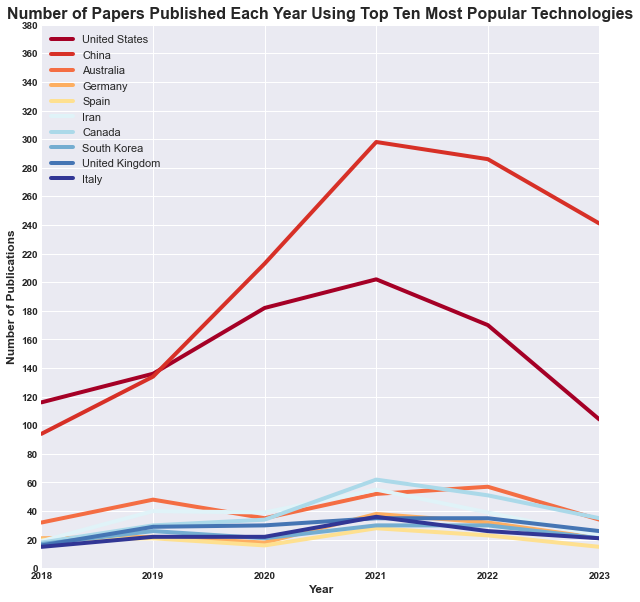

In [77]:
plt.figure(figsize = (10,10))
for i in range(10):
    p = list(sorted_countries.items())[i]
    plt.plot(range(2018, 2024), p[1], label = p[0], linewidth = 4, color = custom_cmap.colors[i])

plt.xlabel("Year")
plt.ylabel("Number of publications")
# plt.style.use('seaborn-darkgrid')
plt.title("Number of Papers Published Each Year Using Top Ten Most Popular Technologies", fontsize = 16, weight = 'bold')

# plt.legend(loc=2, fontsize='large')
plt.ylabel("Number of Publications", fontsize = 12, weight = 'bold')
plt.xlabel("Year", fontsize = 12, weight = 'bold')
# plt.gca().invert_yaxis()
plt.yticks(np.arange(0, 400, 20), fontsize = 10, weight = 'bold')
plt.xticks(range(2018,2024), fontsize = 10, weight = 'bold')
plt.margins(x=0)
plt.legend(loc='upper left')
plt.savefig('papers_countries_per_year.png')
plt.show()

In [38]:
words

,topic,keywords
0,AI and Machine Learning,"[Artificial Intelligence, Machine Learning, Su..."
1,Big Data,"[Hadoop, NoSQL, Apache Flink, Apache Kafka, Bi..."
2,Blockchain and Cryptocurrency,"[Blockchain, Cryptocurrency, Bitcoin, Ethereum..."
3,IoT,"[Smart Medical Device, Industrial IoT, Home Au..."
4,AR and VR,"[Augmented Reality, Virtual Reality, Mixed Rea..."
5,Cybersecurity,"[Cybersecurity, Ethical Hacking, Intrusion Det..."
6,Automation,"[Automation, Industrial Automation, Home Autom..."
7,Modeling,"[Modeling, Modelling, ArcGIS, HEC-RAS, MIKE, F..."
8,NLP,"[NLP, Natural Language Processing, Sentiment A..."
9,Quantum Computing,"[Quantum Computing, Quantum Algorithm, Quantum..."


In [152]:
j = 0

for i in set(buzzwords_in_papers['paper_id'].tolist()):
    tmp = buzzwords_in_papers[buzzwords_in_papers['paper_id']== i]
    
    words_used = set(tmp['category'].tolist())
    
    if('Machine Learning' in words_used and 'AI' in words_used):
        j+=1
        print(i)
    
print(j)

2
3
4
7
9
10
11
12
13
14
17
18
19
20
21
23
24
25
26
27
29
30
31
32
33
34
35
37
38
40
42
43
44
45
46
47
50
53
54
55
56
57
58
60
64
65
66
67
68
69
71
72
74
75
76
77
78
79
80
84
85
86
87
88
90
92
94
95
96
97
98
100
102
103
107
108
109
110
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
131
132
133
134
135
137
139
140
141
142
143
145
146
147
149
152
153
155
158
159
160
162
163
164
165
167
170
171
172
174
177
178
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
202
203
205
206
207
208
209
210
213
214
215
216
217
218
220
221
222
223
225
226
227
228
229
230
232
233
234
235
236
237
238
239
240
241
246
247
249
250
251
252
254
255
256
257
258
259
260
261
262
263
264
266
267
268
269
270
271
272
276
277
279
281
283
284
286
288
289
290
291
292
293
294
295
297
298
299
300
301
303
304
305
306
309
312
313
314
315
316
317
318
319
320
321
323
324
327
328
330
331
333
334
336
337
338
339
340
341
342
344
347
349
350
351
354
355
356
358
360
361
362
363
364


2785
2786
2787
2788
2789
2790
2791
2792
2795
2796
2797
2798
2799
2800
2801
2803
2805
2806
2807
2808
2809
2810
2812
2814
2815
2817
2818
2819
2822
2823
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2836
2837
2838
2840
2841
2842
2844
2845
2846
2847
2848
2849
2850
2851
2853
2854
2855
2856
2857
2858
2859
2860
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2889
2890
2891
2893
2894
2895
2896
2897
2898
2899
2900
2901
2903
2904
2905
2906
2907
2908
2912
2913
2914
2915
2916
2917
2918
2919
2920
2922
2925
2927
2928
2931
2932
2933
2934
2935
2937
2938
2939
2940
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2954
2955
2956
2957
2958
2959
2960
2961
2963
2966
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2980
2981
2982
2983
2985
2986
2988
2989
2990
2991
2993
2994
2995
2996
2997
2999
3000
3002
3004
3005
3006
3008
3009
3010
3011
3012
3014
3015
3016
3018
3019
3020
3021
3023
3025
3026
3028
3030
3031
3032
3033
3034


KeyboardInterrupt: 

In [48]:
new_i

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,25,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,22,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,47,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24737,4,0,0,0,0,1,0,15,0,0,...,0,0,0,1,0,0,0,0,0,0
24738,5,0,0,0,0,0,0,31,0,0,...,0,0,0,5,0,0,0,0,0,1
24740,0,0,0,0,0,3,0,18,0,0,...,3,0,0,0,0,0,0,0,0,11


In [106]:
pairs = {}

In [34]:
list(new_i.loc[1].to_numpy().nonzero()[0])

[7, 14]

In [107]:
for i in set(new_i.index.tolist()):
#     tmp = buzzwords_in_papers[buzzwords_in_papers['index']== i]
    
    indexes = list(new_i.loc[i].to_numpy().nonzero()[0])
    for j in range(len(indexes)):
        for k in range(j+1, len(indexes)):
            if (indexes[j],indexes[k]) in pairs.keys():
                pairs[(indexes[j],indexes[k])] +=1
            else:
                pairs[(indexes[j],indexes[k])] = 1

NameError: name 'new_i' is not defined

In [38]:
pairs

{(0, 1): 8611,
 (0, 2): 6785,
 (0, 3): 4668,
 (1, 2): 6785,
 (1, 3): 4668,
 (2, 3): 4668,
 (0, 4): 2846,
 (0, 5): 1561,
 (0, 6): 810,
 (0, 7): 398,
 (1, 4): 2846,
 (1, 5): 1561,
 (1, 6): 810,
 (1, 7): 398,
 (2, 4): 2846,
 (2, 5): 1561,
 (2, 6): 810,
 (2, 7): 398,
 (3, 4): 2846,
 (3, 5): 1561,
 (3, 6): 810,
 (3, 7): 398,
 (4, 5): 1561,
 (4, 6): 810,
 (4, 7): 398,
 (5, 6): 810,
 (5, 7): 398,
 (6, 7): 398,
 (0, 8): 211,
 (1, 8): 211,
 (2, 8): 211,
 (3, 8): 211,
 (4, 8): 211,
 (5, 8): 211,
 (6, 8): 211,
 (7, 8): 211,
 (0, 9): 109,
 (1, 9): 109,
 (2, 9): 109,
 (3, 9): 109,
 (4, 9): 109,
 (5, 9): 109,
 (6, 9): 109,
 (7, 9): 109,
 (8, 9): 109,
 (0, 10): 56,
 (1, 10): 56,
 (2, 10): 56,
 (3, 10): 56,
 (4, 10): 56,
 (5, 10): 56,
 (6, 10): 56,
 (7, 10): 56,
 (8, 10): 56,
 (9, 10): 56,
 (0, 11): 30,
 (0, 12): 18,
 (1, 11): 30,
 (1, 12): 18,
 (2, 11): 30,
 (2, 12): 18,
 (3, 11): 30,
 (3, 12): 18,
 (4, 11): 30,
 (4, 12): 18,
 (5, 11): 30,
 (5, 12): 18,
 (6, 11): 30,
 (6, 12): 18,
 (7, 11): 30,
 (7, 

In [9]:
dropped

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,25,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,22,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,26,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,26,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,47,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9816,24737,4,0,0,0,0,1,0,15,0,...,0,0,0,1,0,0,0,0,0,0
9817,24738,5,0,0,0,0,0,0,31,0,...,0,0,0,5,0,0,0,0,0,1
9818,24740,0,0,0,0,0,3,0,18,0,...,3,0,0,0,0,0,0,0,0,11
9819,24741,0,0,0,0,0,0,0,30,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
new_i = dropped.set_index('Unnamed: 0')

In [12]:
new_i

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,25,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,22,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,47,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24737,4,0,0,0,0,1,0,15,0,0,...,0,0,0,1,0,0,0,0,0,0
24738,5,0,0,0,0,0,0,31,0,0,...,0,0,0,5,0,0,0,0,0,1
24740,0,0,0,0,0,3,0,18,0,0,...,3,0,0,0,0,0,0,0,0,11


In [15]:
papers = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/papers/final_valid_papers.csv')

In [16]:
papers

,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
0,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104474,2023-08-01,S0309170823001094,2-s2.0-85161258968,8.516126e+10,0.0,"58307014400, 36008901600, 26635952600",60031268:60031268:60007989,True
1,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104475,2023-08-01,S0309170823001100,2-s2.0-85161636300,8.516164e+10,0.0,"53984251100, 35610240400","60104134:60104134, 60022461",True
2,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104476,2023-08-01,S0309170823001112,2-s2.0-85161667219,8.516167e+10,0.0,25822520800,60025063,True
3,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104477,2023-08-01,S0309170823001124,2-s2.0-85161661769,8.516166e+10,0.0,"57210424267, 36160282300, 7404296426",60018394:60018394:60018394,True
4,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104485,2023-08-01,S0309170823001203,2-s2.0-85161678744,8.516168e+10,0.0,"56708113100, 7202660185",60030447:60007566,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26469,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.020,2018-01-01,S1364815217304140,2-s2.0-85032268729,8.503227e+10,142.0,"34571084000, 55188785600, 33767605600, 5721638...","60016437:60012197:60012197:60012197, 60025278:...",True
26470,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.010,2018-01-01,S1364815216304005,2-s2.0-85032353211,8.503235e+10,54.0,"37111876100, 15069126500, 57189996027, 3574567...","60013141:60025182:60025182:60025182:60013141, ...",True
26471,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.08.002,2018-01-01,S1364815216309550,2-s2.0-85032684995,8.503268e+10,5.0,"7006615627, 49661600900, 15132591800, 66033150...","60021439:60030486, 109682148:60021439:60021439...",True
26472,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.011,2018-01-01,S136481521630843X,2-s2.0-85032736133,8.503274e+10,45.0,"56111768300, 37010006200, 43361846100, 5611302...",60068861:60020071:60068861:60024695:60102538:6...,True


In [17]:
c_papers = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/corpus_papers.csv')

In [20]:
c_i = c_papers.set_index("Unnamed: 0")

In [21]:
c_i

,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
Unnamed: 0,,,,,,,,,,,,,
0,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104474,2023-08-01,S0309170823001094,2-s2.0-85161258968,8.516126e+10,0.0,"58307014400, 36008901600, 26635952600",60031268:60031268:60007989,True
1,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104475,2023-08-01,S0309170823001100,2-s2.0-85161636300,8.516164e+10,0.0,"53984251100, 35610240400","60104134:60104134, 60022461",True
3,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104477,2023-08-01,S0309170823001124,2-s2.0-85161661769,8.516166e+10,0.0,"57210424267, 36160282300, 7404296426",60018394:60018394:60018394,True
4,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104485,2023-08-01,S0309170823001203,2-s2.0-85161678744,8.516168e+10,0.0,"56708113100, 7202660185",60030447:60007566,True
5,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104441,2023-08-01,S0309170823000763,2-s2.0-85161836812,8.516184e+10,0.0,"57886962200, 36559092800",60010065:60010065,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24737,27,47,2020,https://www.sciencedirect.com/science/article/...,10.1016/j.ecolmodel.2020.109280,2020-11-15,S0304380020303501,2-s2.0-85090927013,8.509093e+10,3.0,"23024388700, 7101905813, 35361990500, 66029039...",60017028:60113653:125122077:60084653:60000961,True
24738,27,47,2020,https://www.sciencedirect.com/science/article/...,10.1016/j.ecolmodel.2020.109286,2020-11-15,S0304380020303562,2-s2.0-85090881697,8.509088e+10,7.0,"57205669891, 35721643400, 36972298000, 3533988...",60050715:60050715:60050715:60050715,True
24740,27,47,2020,https://www.sciencedirect.com/science/article/...,10.1016/j.ecolmodel.2020.109295,2020-11-15,S0304380020303653,2-s2.0-85091224515,8.509122e+10,4.0,"37032101300, 57219093332, 56024528100, 7003432534",60019762:60019839:60019839:60019839,True


In [22]:
papers_step3 = c_i.loc[new_i.index.tolist()]

In [23]:
papers_step3

,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
Unnamed: 0,,,,,,,,,,,,,
0,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104474,2023-08-01,S0309170823001094,2-s2.0-85161258968,8.516126e+10,0.0,"58307014400, 36008901600, 26635952600",60031268:60031268:60007989,True
1,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104475,2023-08-01,S0309170823001100,2-s2.0-85161636300,8.516164e+10,0.0,"53984251100, 35610240400","60104134:60104134, 60022461",True
3,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104477,2023-08-01,S0309170823001124,2-s2.0-85161661769,8.516166e+10,0.0,"57210424267, 36160282300, 7404296426",60018394:60018394:60018394,True
4,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104485,2023-08-01,S0309170823001203,2-s2.0-85161678744,8.516168e+10,0.0,"56708113100, 7202660185",60030447:60007566,True
5,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104441,2023-08-01,S0309170823000763,2-s2.0-85161836812,8.516184e+10,0.0,"57886962200, 36559092800",60010065:60010065,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24737,27,47,2020,https://www.sciencedirect.com/science/article/...,10.1016/j.ecolmodel.2020.109280,2020-11-15,S0304380020303501,2-s2.0-85090927013,8.509093e+10,3.0,"23024388700, 7101905813, 35361990500, 66029039...",60017028:60113653:125122077:60084653:60000961,True
24738,27,47,2020,https://www.sciencedirect.com/science/article/...,10.1016/j.ecolmodel.2020.109286,2020-11-15,S0304380020303562,2-s2.0-85090881697,8.509088e+10,7.0,"57205669891, 35721643400, 36972298000, 3533988...",60050715:60050715:60050715:60050715,True
24740,27,47,2020,https://www.sciencedirect.com/science/article/...,10.1016/j.ecolmodel.2020.109295,2020-11-15,S0304380020303653,2-s2.0-85091224515,8.509122e+10,4.0,"37032101300, 57219093332, 56024528100, 7003432534",60019762:60019839:60019839:60019839,True


In [105]:
pair_df = pd.DataFrame(columns = range(28))

for i in range(28):
    pair_df.loc[len(pair_df.index)] = [0]*28
    

In [55]:
vals = set()

for k,v in pairs.items():
    vals.add(k[0])
    vals.add(k[1])

In [56]:
for k,v in pairs.items():
    pair_df.iat[k[0], k[1]] = v/papers.shape[0]
    pair_df.iat[k[1], k[0]] = v/papers.shape[0]

In [188]:
pair_df

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.000000,0.121969,0.020888,0.045781,0.002757,0.041097,0.647352,0.066820,0.177948,0.075017,...,0.089106,0.216250,0.026857,0.000038,0.059983,0.002909,0.018244,0.020700,0.142555,0.355368
1,0.121969,0.000000,0.005666,0.022022,0.001398,0.010236,0.129486,0.018358,0.041286,0.022324,...,0.032409,0.060134,0.008688,0.000000,0.031956,0.001889,0.018886,0.025346,0.057339,0.094999
2,0.020888,0.005666,0.000000,0.003173,0.000189,0.002531,0.023457,0.003173,0.011823,0.004193,...,0.003702,0.012541,0.001360,0.000000,0.002682,0.000189,0.001398,0.001247,0.006119,0.017867
3,0.045781,0.022022,0.003173,0.000000,0.000642,0.006157,0.049445,0.008801,0.021719,0.015336,...,0.012012,0.060286,0.003777,0.000038,0.008159,0.001095,0.009443,0.007403,0.026479,0.042079
4,0.002757,0.001398,0.000189,0.000642,0.000000,0.001398,0.002795,0.000453,0.000944,0.001020,...,0.000642,0.001549,0.000264,0.000000,0.000604,0.000227,0.000264,0.000529,0.001586,0.002191
5,0.041097,0.010236,0.002531,0.006157,0.001398,0.000000,0.044157,0.006610,0.018509,0.007743,...,0.008726,0.020322,0.002644,0.000000,0.005553,0.000264,0.002946,0.003135,0.012125,0.034222
6,0.647352,0.129486,0.023457,0.049445,0.002795,0.044157,0.000000,0.070975,0.190715,0.081401,...,0.094583,0.231926,0.028632,0.000038,0.062439,0.003211,0.020851,0.023608,0.147428,0.382262
7,0.066820,0.018358,0.003173,0.008801,0.000453,0.006610,0.070975,0.000000,0.024703,0.010576,...,0.017867,0.033656,0.013183,0.000000,0.010992,0.000869,0.003664,0.004986,0.024779,0.056131
8,0.177948,0.041286,0.011823,0.021719,0.000944,0.018509,0.190715,0.024703,0.000000,0.021455,...,0.037320,0.095943,0.009179,0.000038,0.023306,0.001284,0.009103,0.010388,0.043628,0.160006
9,0.075017,0.022324,0.004193,0.015336,0.001020,0.007743,0.081401,0.010576,0.021455,0.000000,...,0.014543,0.034373,0.003928,0.000000,0.008650,0.000982,0.005590,0.005288,0.033278,0.065423


In [205]:
tri_pair = np.triu(pair_df)

In [209]:
mask = np.triu(np.ones_like(pair_df, dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=38, center="light", as_cmap=True)

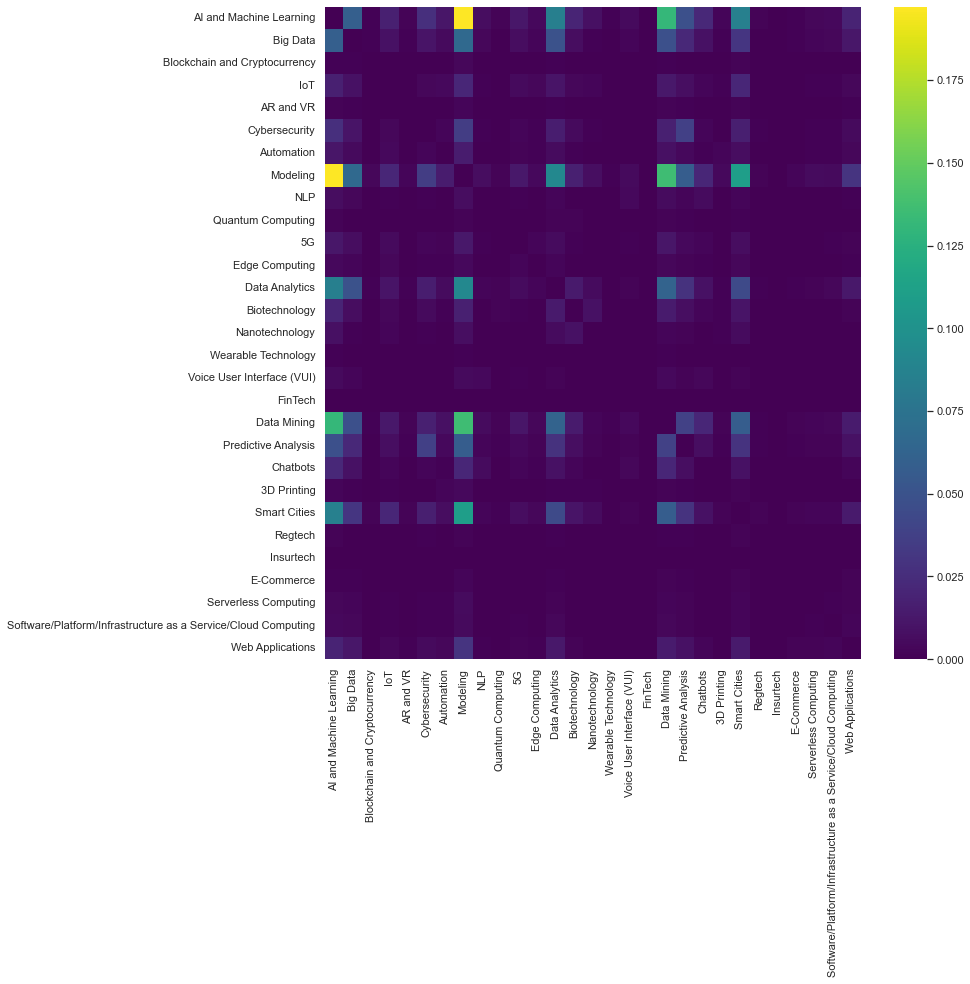

In [58]:
fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1)
sns.heatmap(pair_df, cmap="viridis", xticklabels = words['topic'].tolist(), yticklabels = words['topic'].tolist())
fig.savefig("heatmap_topics.png", transparent = True)

In [215]:
words

,topic,keywords
0,AI,"[Reinforcement Learning, Supervised Learning, ..."
1,Big Data,"[Hadoop, NoSQL, Apache Flink, Apache Kafka, Bi..."
2,Blockchain,"[Blockchain, Ethereum, Smart Contracts, Decent..."
3,IoT,"[Smart Medical Device, Industrial IoT, Home Au..."
4,VR,"[Virtual Reality, Immersive Gaming, Virtual To..."
5,AR,"[Google Glass, Microsoft HoloLens, AR in Marke..."
6,Machine Learning,"[Machine Learning, Scikit-Learn, TensorFlow, P..."
7,Cybersecurity,"[Cybersecurity, Ethical Hacking, Intrusion Det..."
8,Cryptocurrency,"[Cryptocurrency, Bitcoin, Ethereum, Litecoin, ..."
9,Automation,"[Automation, Industrial Automation, Home Autom..."
